In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 数据总览

In [2]:
githubData_DataFrame = pd.read_csv('dataset/github/repository_data.csv')
print(githubData_DataFrame.columns)

Index(['name', 'stars_count', 'forks_count', 'watchers', 'pull_requests',
       'primary_language', 'languages_used', 'commit_count', 'created_at',
       'licence'],
      dtype='object')


In [3]:
githubData_DataFrame.head(100)

name  stars_count  forks_count  watchers  \
0                    freeCodeCamp       359805        30814      8448   
1                         996.ICU       264811        21470      4298   
2          free-programming-books       262380        53302      9544   
3     coding-interview-university       244927        65038      8539   
4                         awesome       235223        24791      7446   
..                            ...          ...          ...       ...   
95                         poetry        23373         1883       184   
96                     detectron2        23370         6375       366   
97                      hammer.js        23362         2662       536   
98  BaseRecyclerViewAdapterHelper        23353         4990       573   
99                     Clone-Wars        23351         1992       464   

    pull_requests primary_language  \
0           31867       TypeScript   
1            1949              NaN   
2            8235              NaN   
3             867              NaN   
4            1859              NaN   
..            ...              ...   
95           2218           Python   
96            556           Python   
97            249       JavaScript   
98            280             Java   
99            125              NaN   

                                       languages_used  commit_count  \
0   ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1                                                 NaN        3189.0   
2                                                 NaN        8286.0   
3                                                 NaN        2314.0   
4                                                 NaN        1074.0   
..                                                ...           ...   
95                                 ['Python', 'HTML']        2719.0   
96  ['Python', 'Cuda', 'C++', 'Shell', 'Dockerfile...        1422.0   
97                      ['JavaScript', 'HTML', 'CSS']        1199.0   
98                                 ['Java', 'Kotlin']        1235.0   
99                                                NaN         318.0   

              created_at                                            licence  
0   2014-12-24T17:49:19Z            BSD 3-Clause "New" or "Revised" License  
1   2019-03-26T07:31:14Z                                              Other  
2   2013-10-11T06:50:37Z                                              Other  
3   2016-06-06T02:34:12Z  Creative Commons Attribution Share Alike 4.0 I...  
4   2014-07-11T13:42:37Z               Creative Commons Zero v1.0 Universal  
..                   ...                                                ...  
95  2018-02-28T15:23:47Z                                        MIT License  
96  2019-09-05T21:30:20Z                                 Apache License 2.0  
97  2012-03-02T12:58:28Z                                        MIT License  
98  2016-04-10T07:40:11Z                                        MIT License  
99  2020-12-02T11:10:16Z             GNU Affero General Public License v3.0  

[100 rows x 10 columns]

show the data type, number of unique value and number of missed value for every attribute

In [4]:
_values, _columns = [], []
for column in githubData_DataFrame:
    _columns.append(column)
    _value = []
    _value.append(githubData_DataFrame[column].dtype)
    _value.append(githubData_DataFrame[column].nunique())
    _value.append(githubData_DataFrame[column].isna().sum())
    _values.append(_value)
pd.DataFrame(data=_values, index=_columns, columns=['dataType', 'number of unique values', 'number of missed values'])

dataType  number of unique values  number of missed values
name               object                  2410862                       13
stars_count         int64                     7644                        0
forks_count         int64                     3804                        0
watchers            int64                     1275                        0
pull_requests       int64                     4289                        0
primary_language   object                      497                   218573
languages_used     object                   328148                   221984
commit_count      float64                    17159                     1921
created_at         object                  2837008                        0
licence            object                       46                  1378200

将数据集中的重复记录删除

In [5]:
print(githubData_DataFrame.shape)
githubData_DataFrame = githubData_DataFrame.drop_duplicates()
githubData_DataFrame.shape

(2917951, 10)


(2851443, 10)

## 数据摘要
### 标称属性
`name` - the name of the repository
`primary_language` - the primary language of the repository
`languages_used` - list of all the languages used in the repository
`created_at` - time and date when the repository was created
`licence` - license assigned to the repository.

In [6]:
attributes = ['name', 'primary_language', 'languages_used', 'created_at', 'licence']
for attribute in attributes:
    print(f'标称属性 {attribute} 所有可能取值的频数:')
    print(githubData_DataFrame[attribute].value_counts())
    print('-----------------------------------------')

标称属性 name 所有可能取值的频数:
name
dotfiles                                           5492
blog                                               1997
docs                                               1320
website                                            1144
scripts                                             635
                                                   ... 
Advanced-optimizer-with-Gradient-Centralization       1
scheme-primer                                         1
react-use-wyre                                        1
slack2roam                                            1
MSI-Z690-Carbon-i7-12700KF-Hackintosh                 1
Name: count, Length: 2410862, dtype: int64
-----------------------------------------
标称属性 primary_language 所有可能取值的频数:
primary_language
JavaScript              443111
Python                  439724
Java                    198375
C++                     146395
PHP                     113955
                         ...  
Wikitext                     1
Sieve 

### 数值属性
`stars_count` - stars count of the repository
`forks_count` - forks count of the repository
`watchers` - watchers in the repository
`pull_requests` - pull requests made in the repository
`commit_count` - commits made in the repository

In [7]:
attributes = ['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count']
for attribute in attributes:
    print(f'数值属性 {attribute} 的五数概括:')
    print(githubData_DataFrame[attribute].describe().loc[['mean', '25%', '50%', '75%', 'max']])
    print('-----------------------------------------')
print('各数值属性缺失值的个数如下表：')
_missingValueNum = []
for attribute in attributes:
    _missingValueNum.append(githubData_DataFrame[attribute].isna().sum())
pd.DataFrame(data=[_missingValueNum], index=['number of missing value'], columns=attributes)

数值属性 stars_count 的五数概括:
mean        77.120236
25%          7.000000
50%         12.000000
75%         29.000000
max     359805.000000
Name: stars_count, dtype: float64
-----------------------------------------
数值属性 forks_count 的五数概括:
mean        21.062328
25%          1.000000
50%          4.000000
75%         11.000000
max     242208.000000
Name: forks_count, dtype: float64
-----------------------------------------
数值属性 watchers 的五数概括:
mean       7.163049
25%        2.000000
50%        3.000000
75%        6.000000
max     9544.000000
Name: watchers, dtype: float64
-----------------------------------------
数值属性 pull_requests 的五数概括:
mean        24.37062
25%          0.00000
50%          1.00000
75%          6.00000
max     301585.00000
Name: pull_requests, dtype: float64
-----------------------------------------
数值属性 commit_count 的五数概括:
mean    6.159885e+02
25%     9.000000e+00
50%     2.700000e+01
75%     8.900000e+01
max     4.314502e+06
Name: commit_count, dtype: float64
------------

stars_count  forks_count  watchers  pull_requests  \
number of missing value            0            0         0              0   

                         commit_count  
number of missing value          1887

## 数据可视化

### 标称属性直方图

In [8]:
def draw_top50_hist(attr):
    attr_count = pd.DataFrame(githubData_DataFrame[attr].value_counts())
    plt.figure(figsize=(40, 40))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.barh(attr_count.index[:50][::-1], width=attr_count['count'][:50][::-1])
    plt.ylabel(attr, fontsize=25)
    plt.xlabel(f'number of {attr}', fontsize=25)
    plt.title(f"{attr}'s Top 50", fontsize=30, loc='center')
    plt.show()

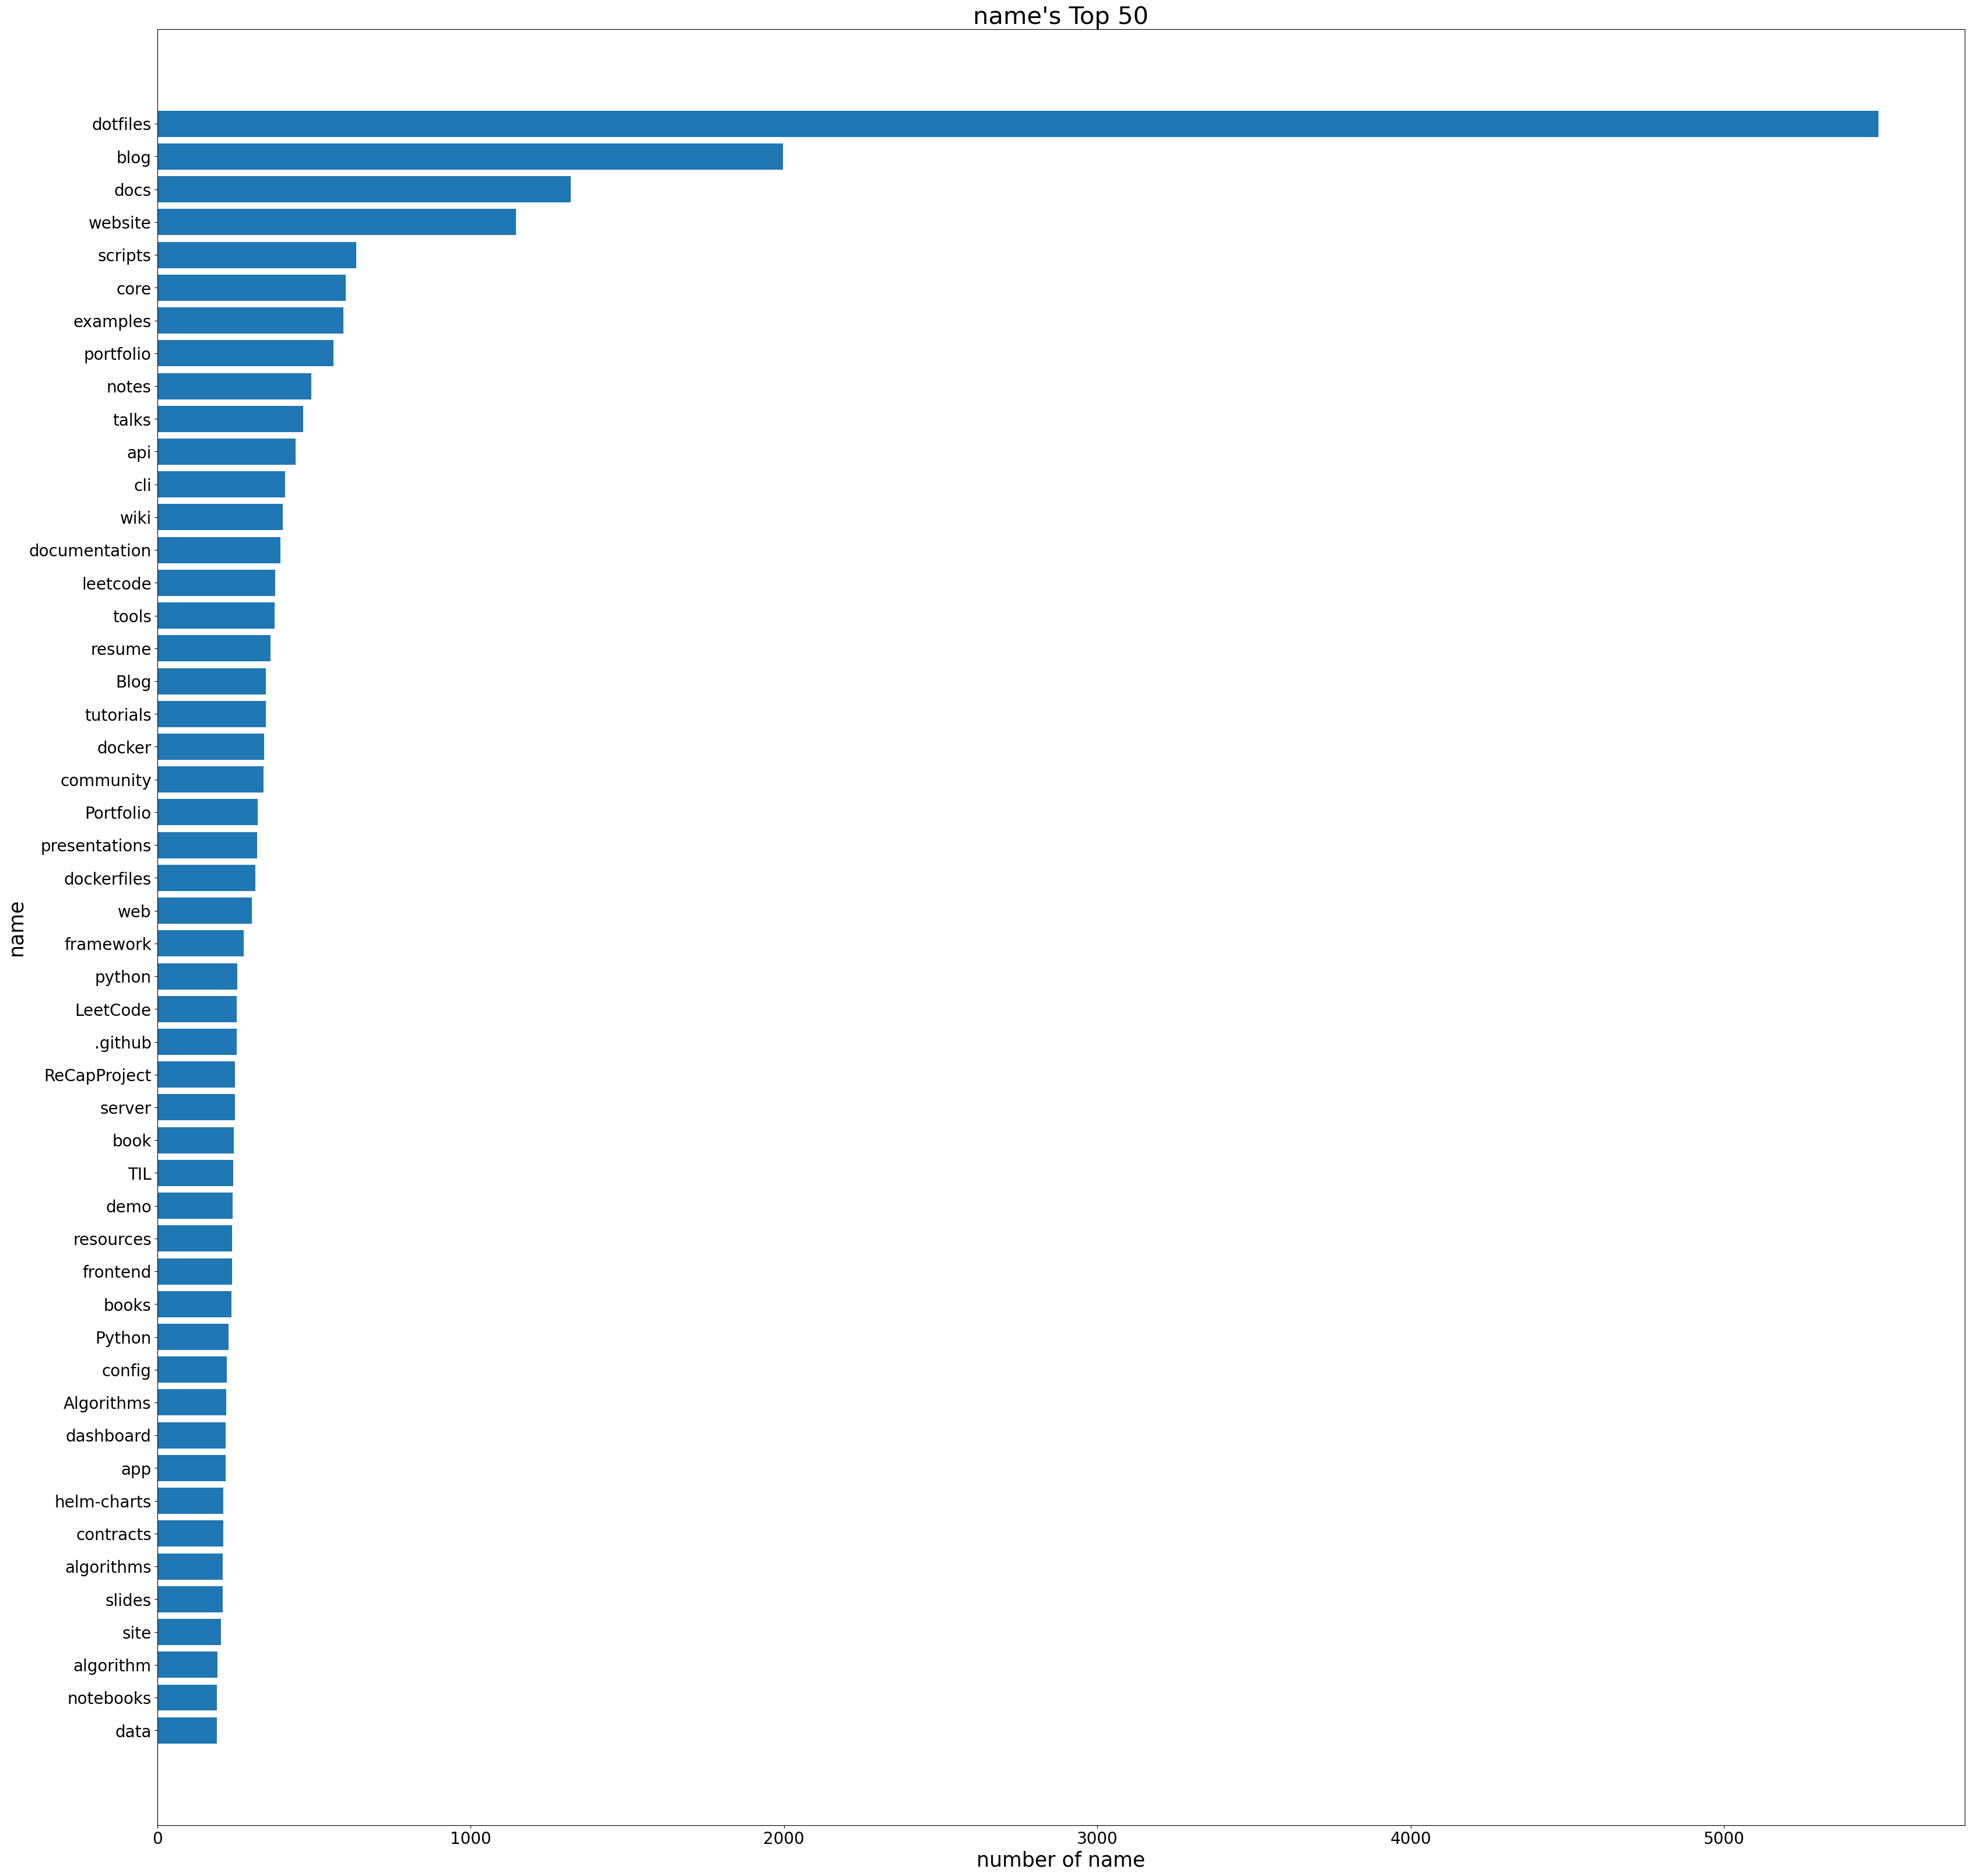

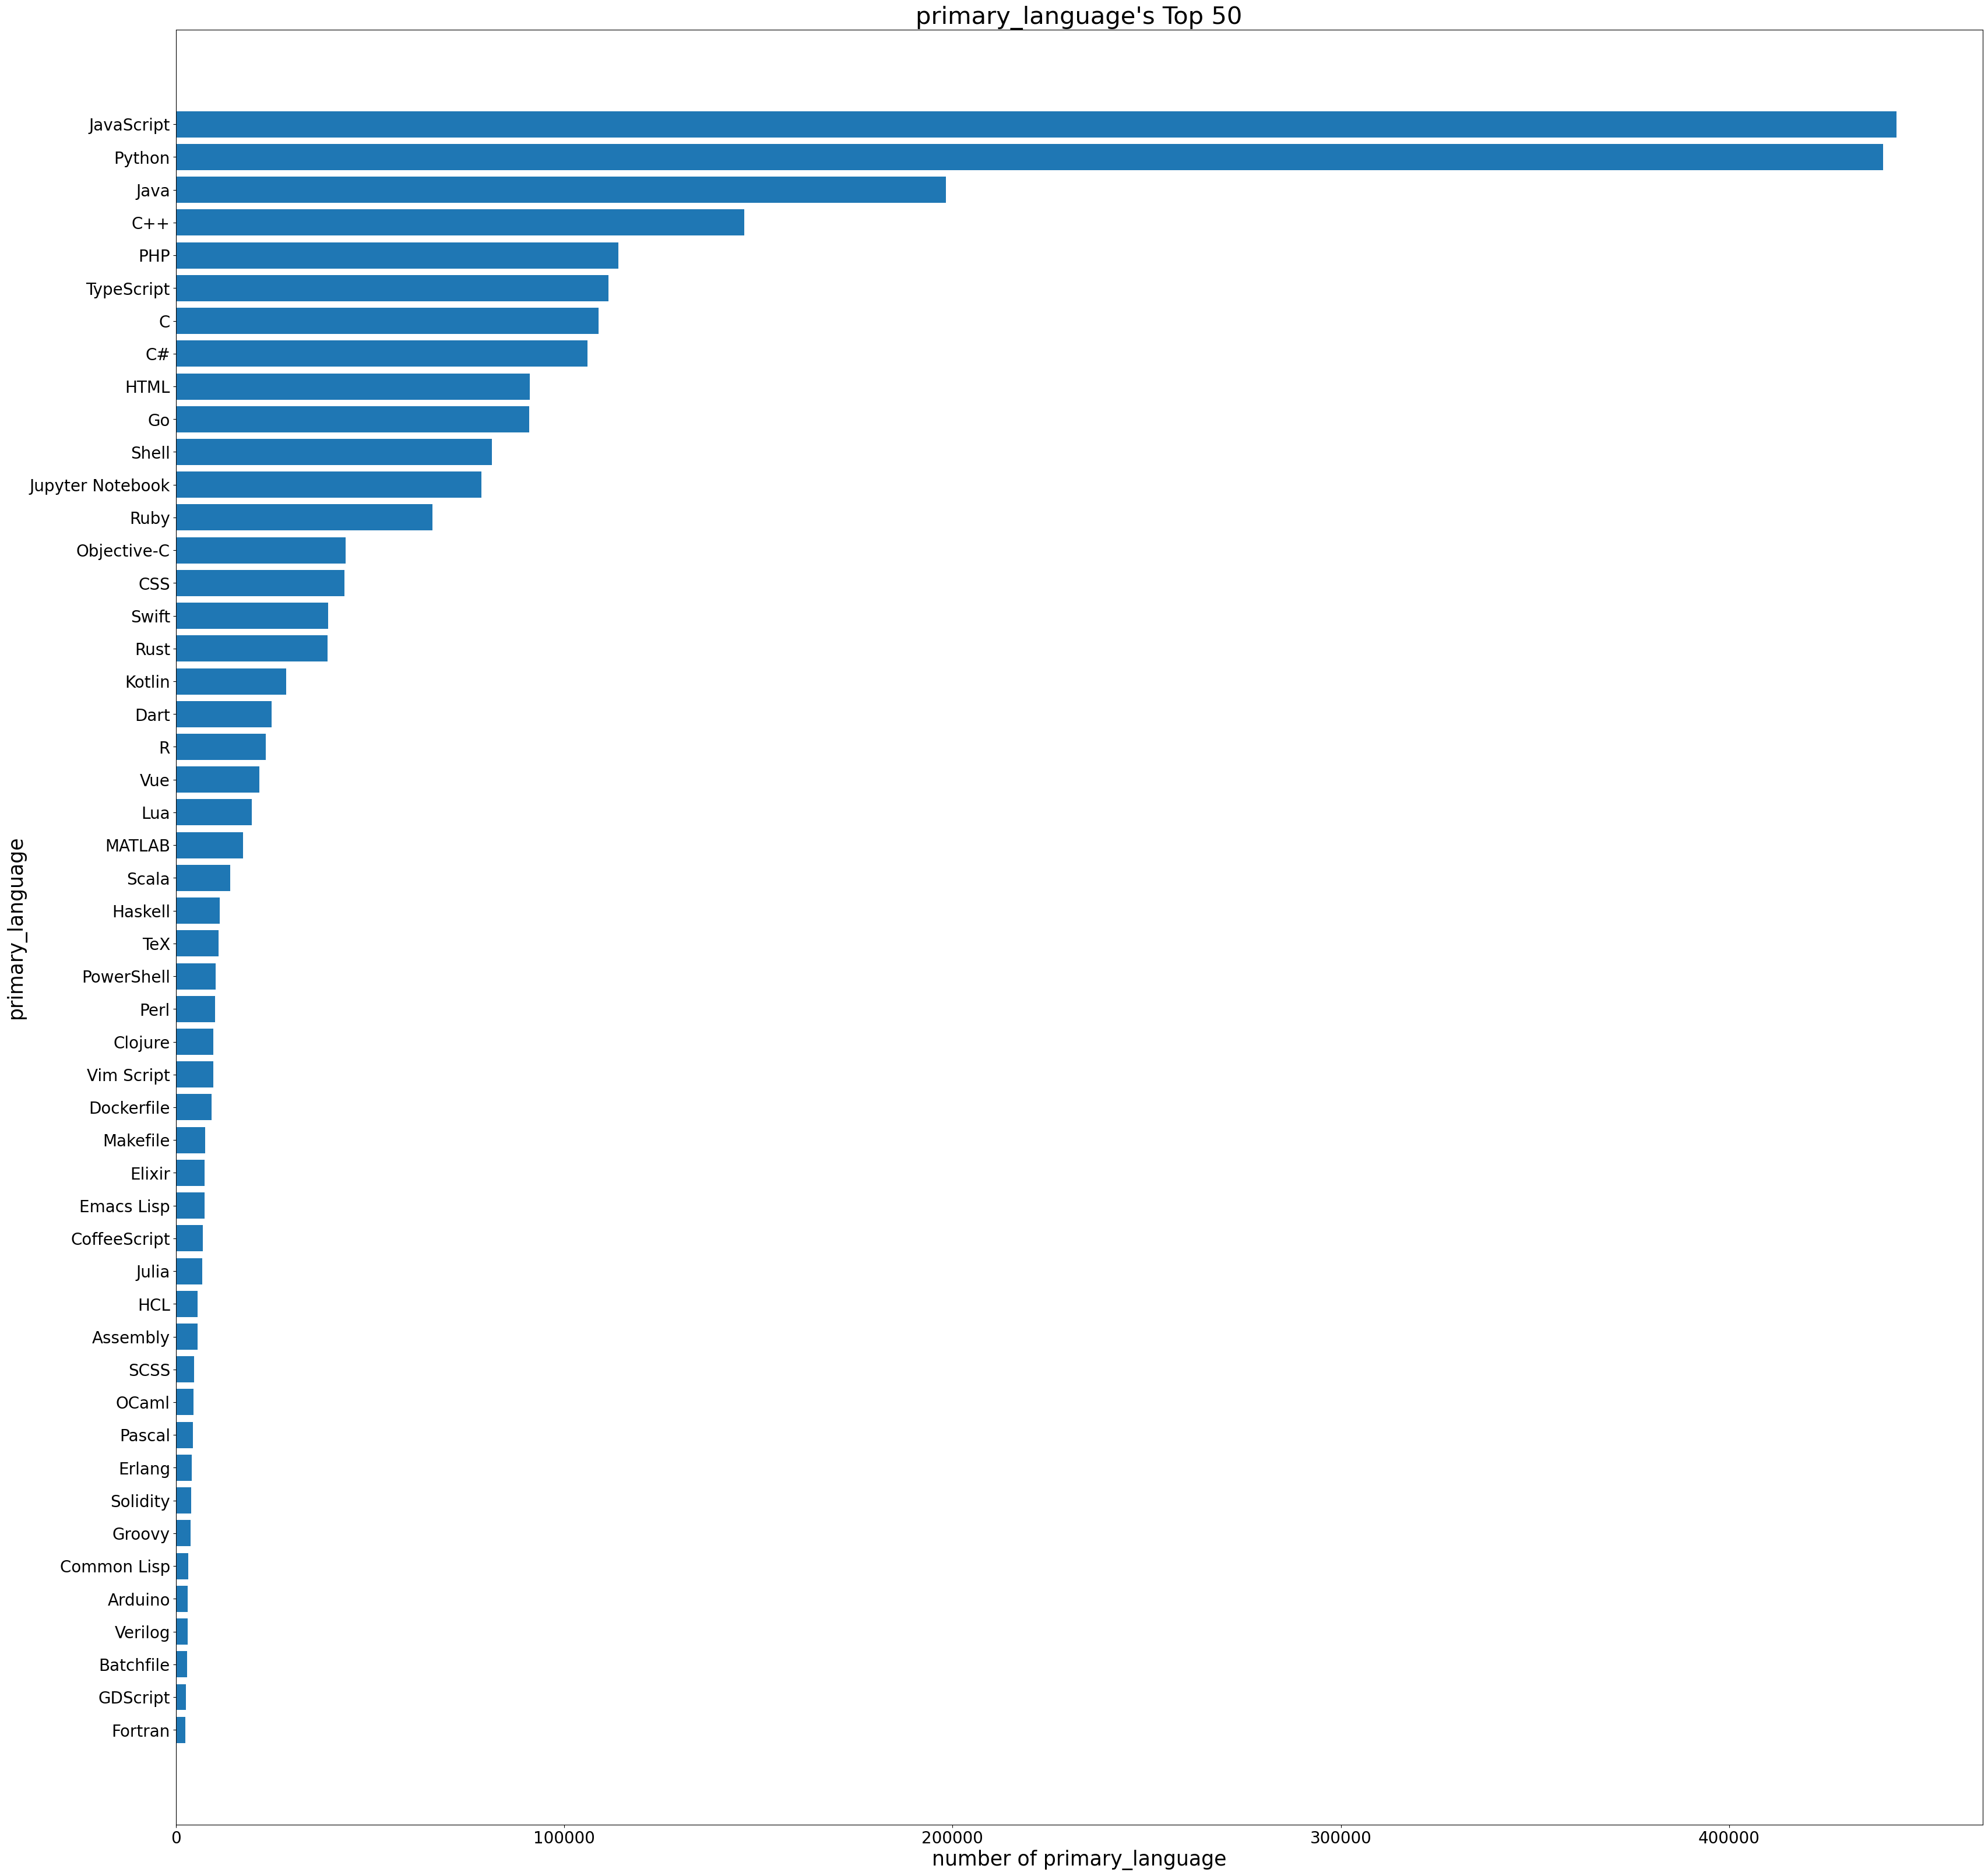

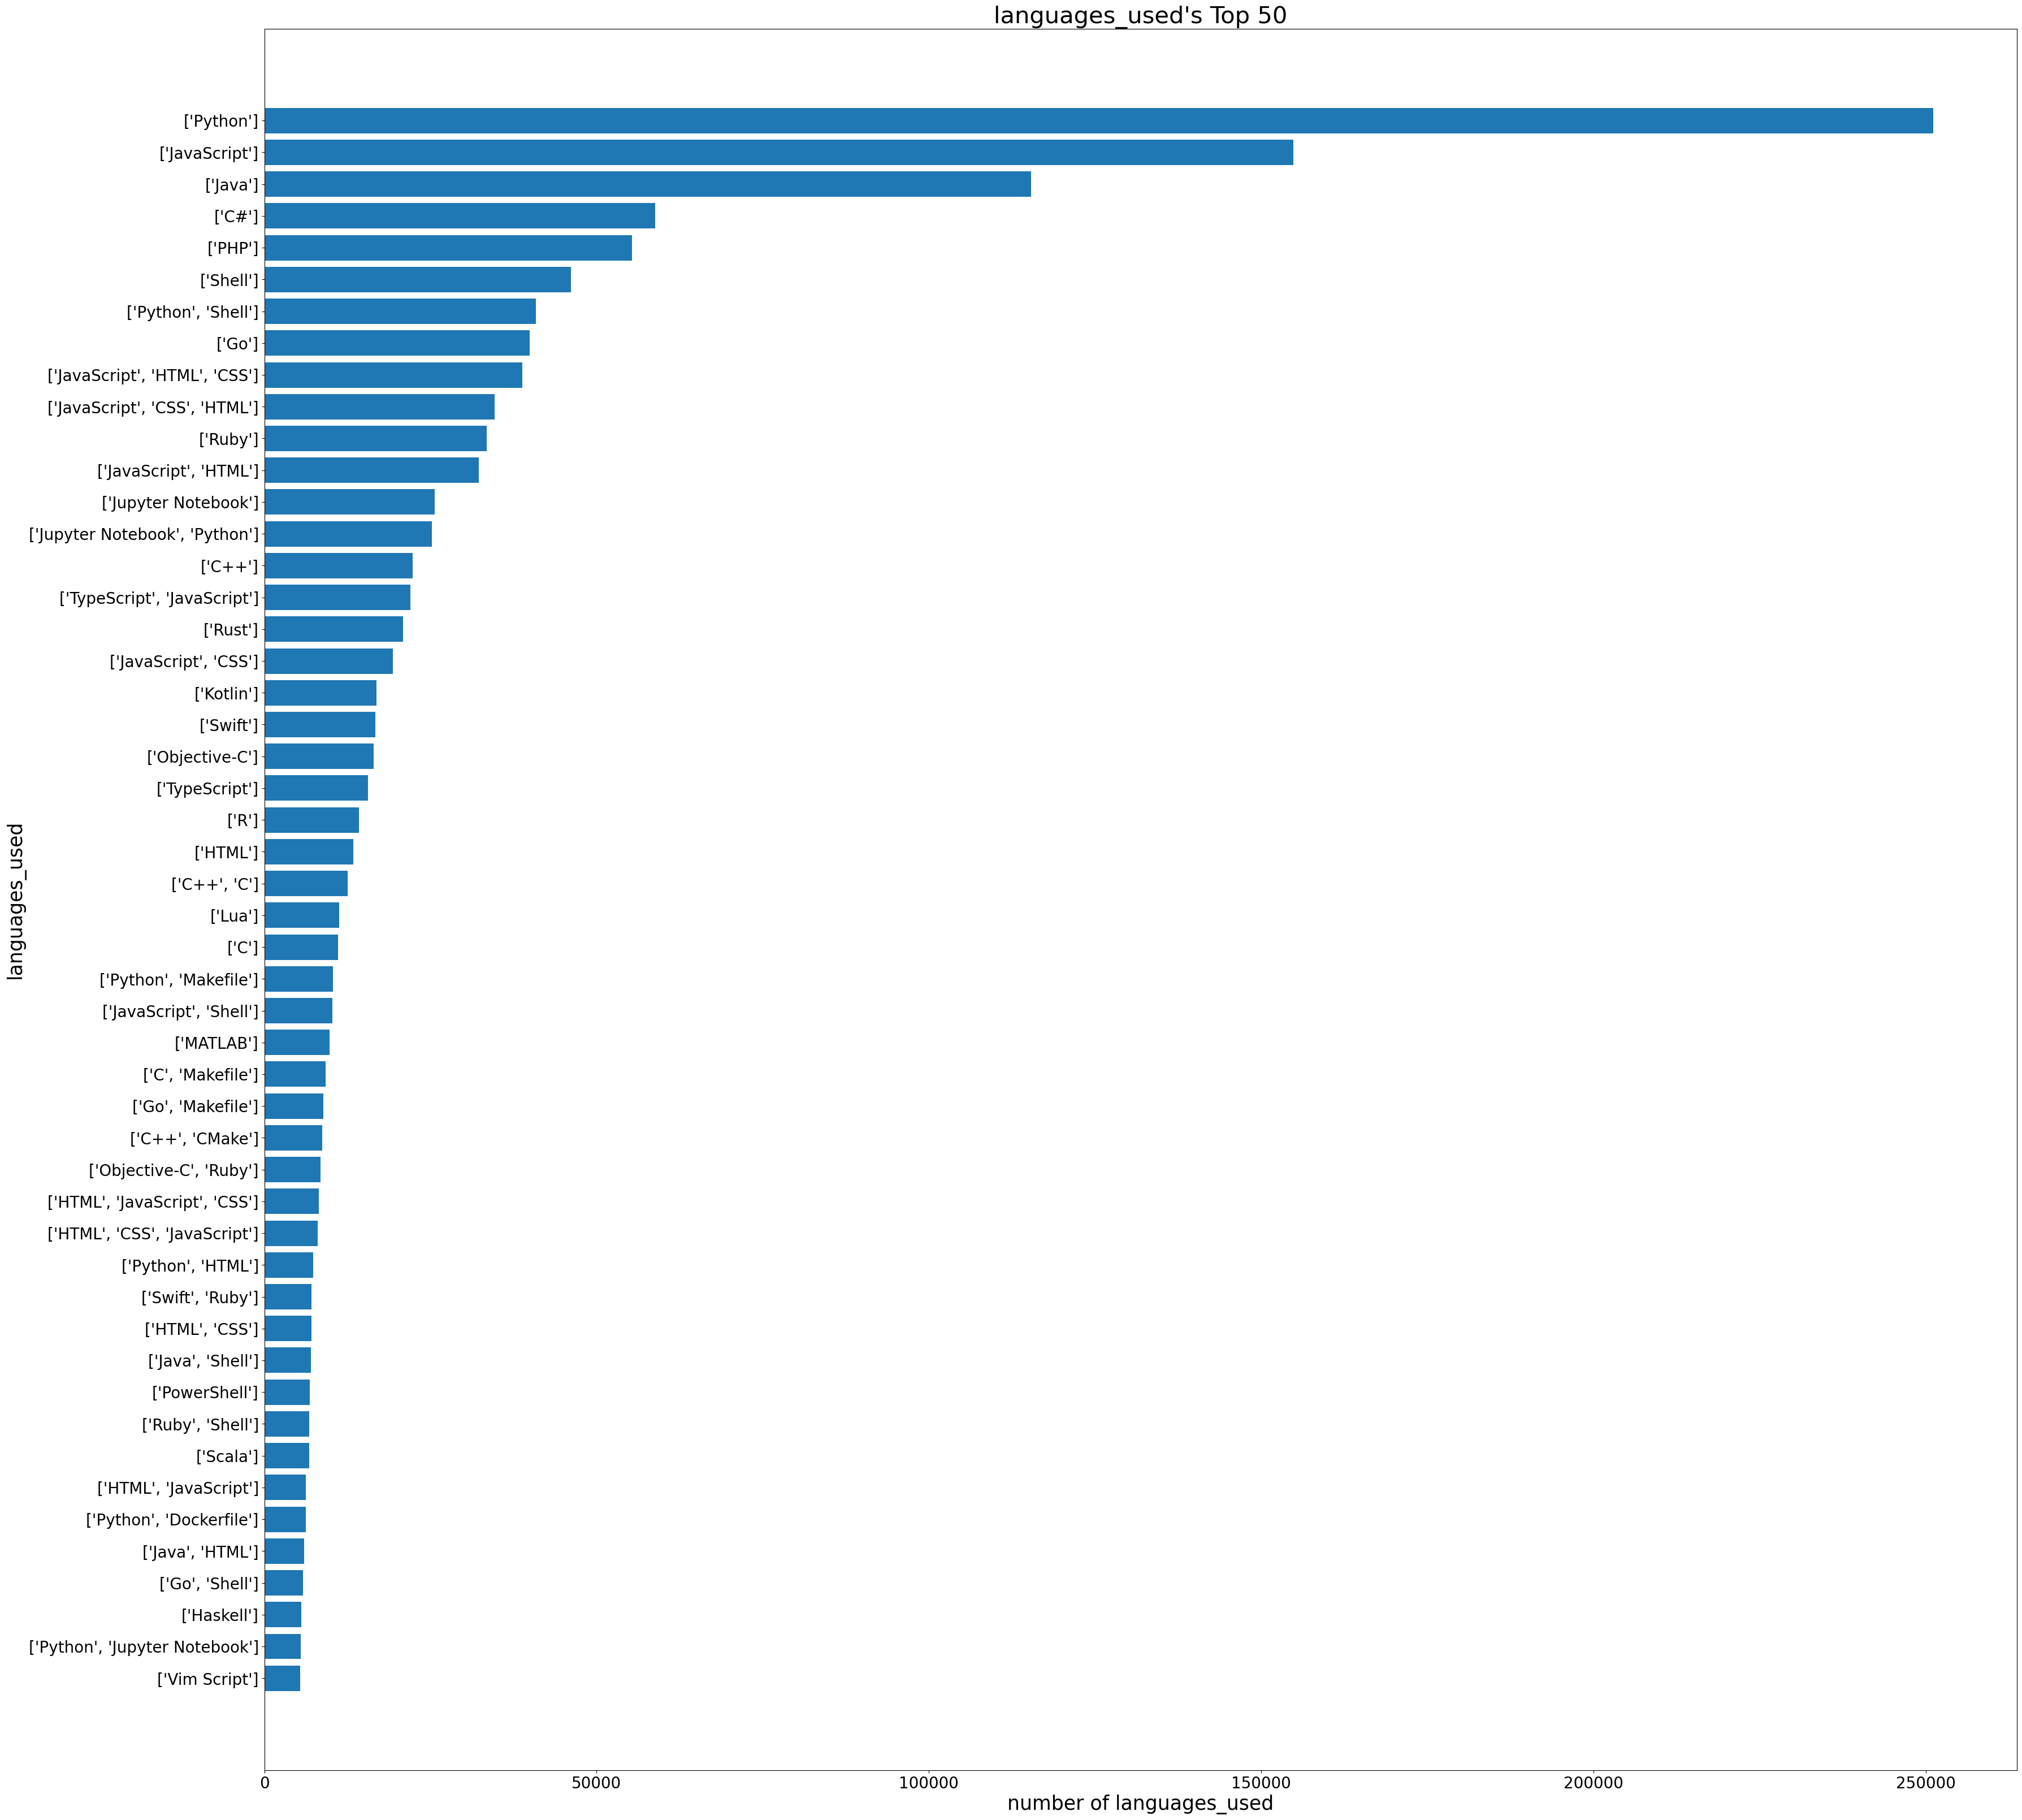

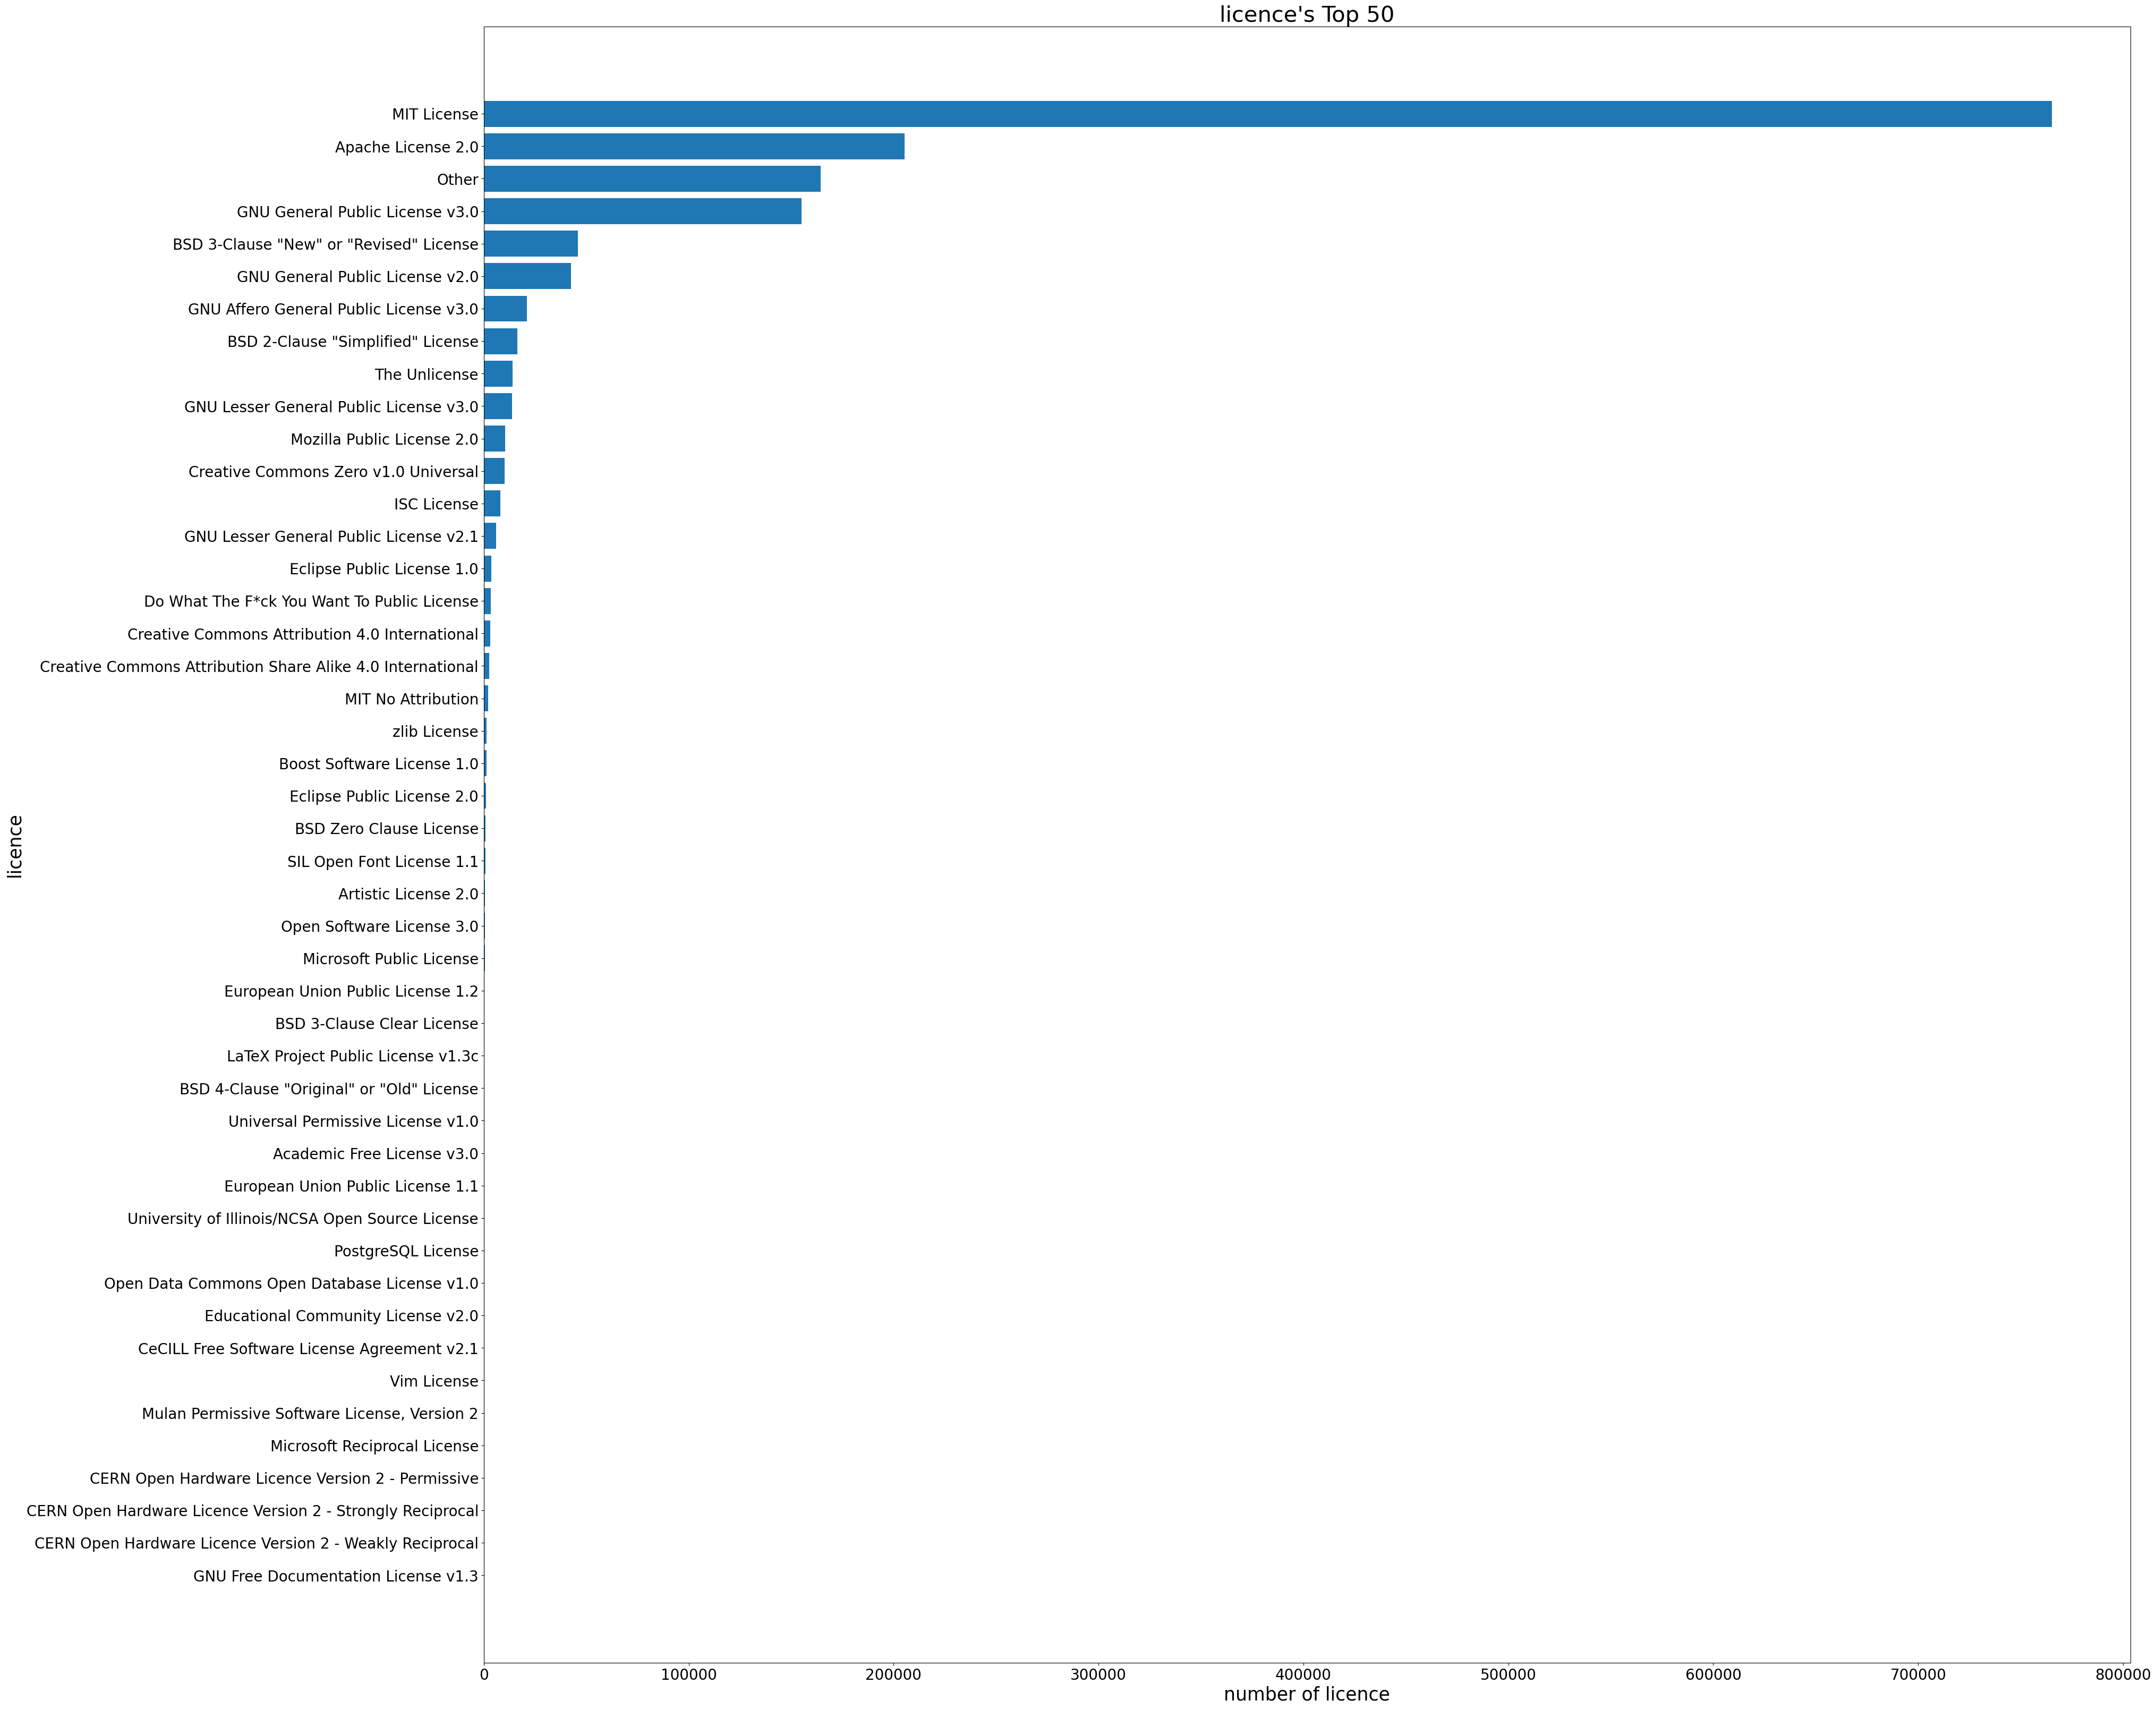

In [9]:
attributes = ['name', 'primary_language', 'languages_used', 'licence']
for attribute in attributes:
    draw_top50_hist(attribute)

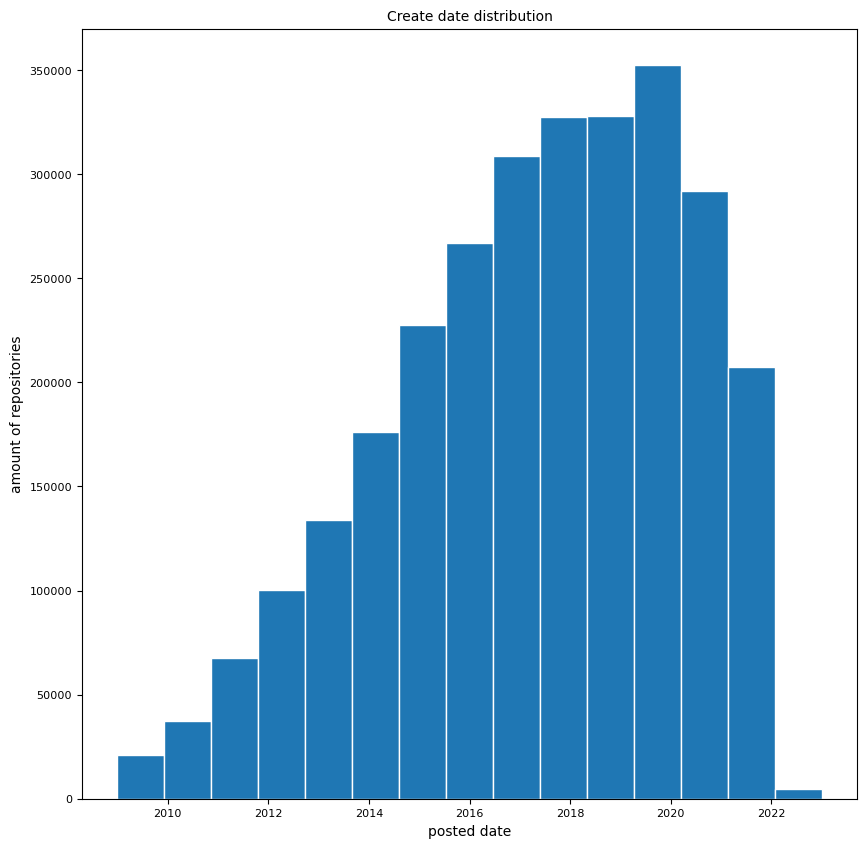

In [10]:
plt.figure(figsize=(10, 10))
years = pd.to_datetime(githubData_DataFrame['created_at']).dt.year
plt.hist(years, bins=15, edgecolor='white')
plt.title('Create date distribution', fontsize=10, loc='center')
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('amount of repositories', fontsize=10)
plt.xlabel('posted date', fontsize=10)
plt.show()

### 数值属性直方图

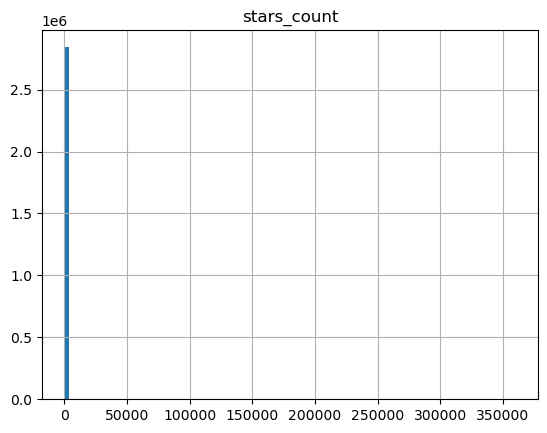

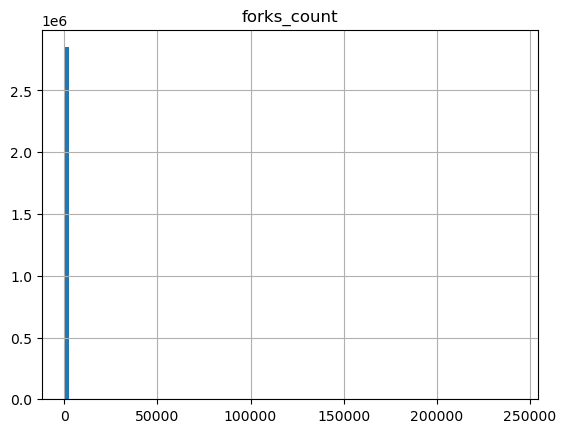

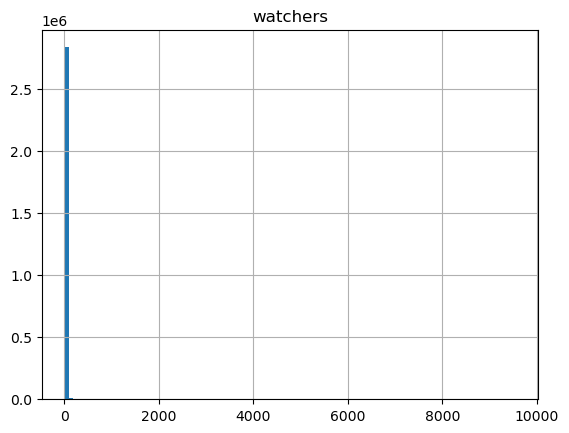

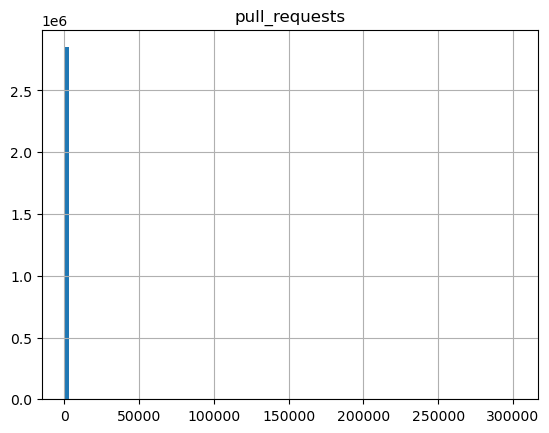

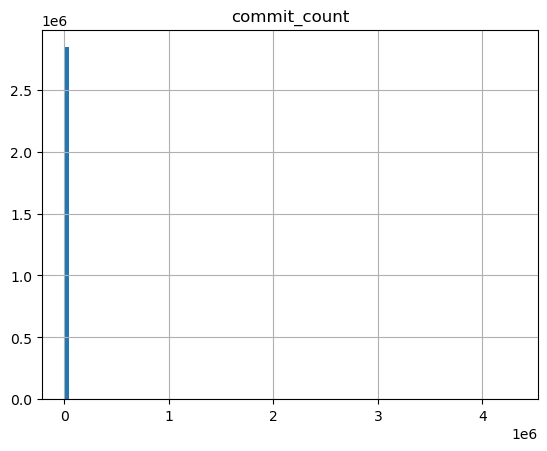

In [11]:
attributes = ['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count']
for attribute in attributes:
    githubData_DataFrame.hist(column=attribute, bins=100)

### 数值属性盒图

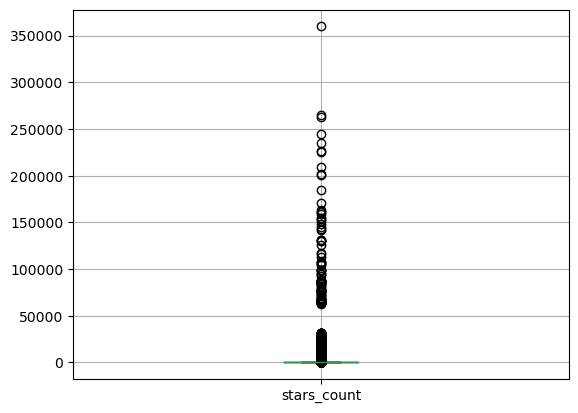

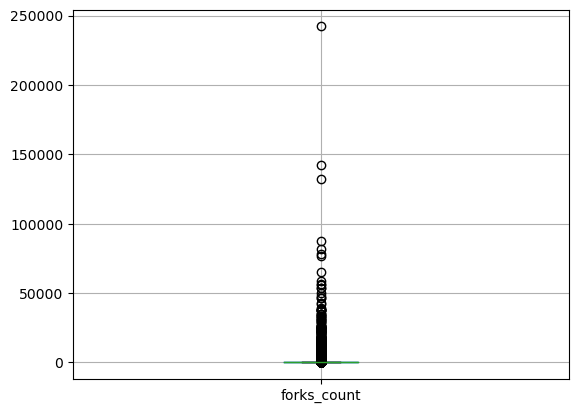

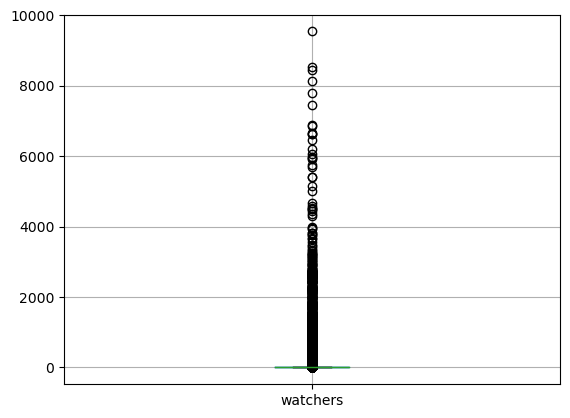

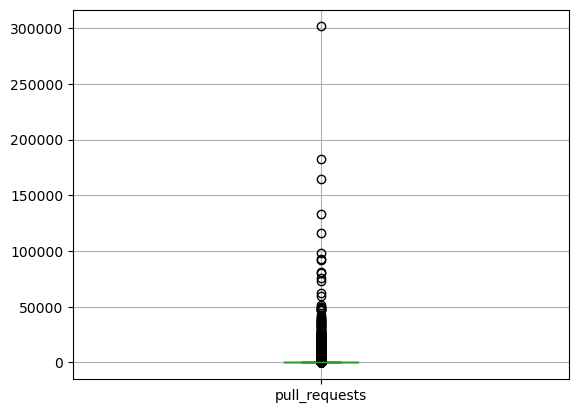

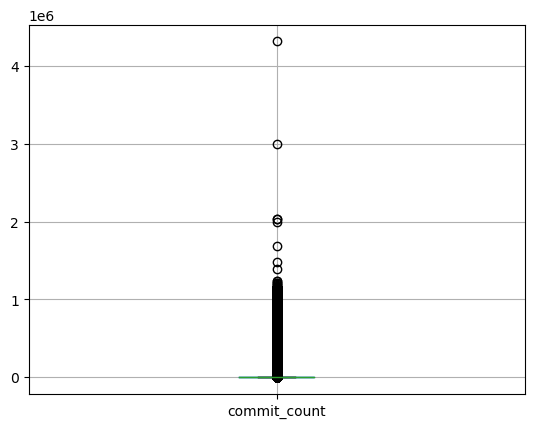

In [12]:
attributes = []
for column in githubData_DataFrame.columns:
    if githubData_DataFrame[column].dtype != object:
        attributes.append(column)
for attribute in attributes:
    plt.figure()
    githubData_DataFrame.boxplot(column=attribute)

## 数据缺失处理

In [13]:
_values, _columns = [], []
for column in githubData_DataFrame:
    _columns.append(column)
    _values.append([githubData_DataFrame[column].isna().sum()])
pd.DataFrame(data=_values, index=_columns, columns=['number of missed values'])

number of missed values
name                                   13
stars_count                             0
forks_count                             0
watchers                                0
pull_requests                           0
primary_language                   213334
languages_used                     216717
commit_count                         1887
created_at                              0
licence                           1348948

### 方法一：将缺失部分剔除

In [14]:
cleaned_data_by_remove_nan = githubData_DataFrame.dropna()
githubData_DataFrame.shape, cleaned_data_by_remove_nan.shape

((2851443, 10), (1436035, 10))

新旧数据对比

In [15]:
def draw_top50_hist_compare(attr, dataframe_old, dataframe_new):
    attr_count_old = pd.DataFrame(dataframe_old[attr].value_counts())
    attr_count_new = pd.DataFrame(dataframe_new[attr].value_counts())
    selected_attr_count_new = np.zeros(attr_count_old.index[:50].shape, dtype='int')
    selected_attrs = attr_count_old.index[:50][::-1]
    idx = 0
    for selected_attr in selected_attrs:
        if selected_attr in attr_count_new.index:
            selected_attr_count_new[idx] = attr_count_new.loc[selected_attr, 'count']
        idx += 1
    plt.figure(figsize=(40, 40))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.barh(list(range(len(attr_count_old.index[:50][::-1]))), height=0.35, tick_label=attr_count_old.index[:50][::-1],
             width=attr_count_old['count'][:50][::-1], label='old_data')
    plt.barh([i + 0.4 for i in range(len(attr_count_old.index[:50][::-1]))], height=0.35,
             tick_label=attr_count_old.index[:50][::-1], width=selected_attr_count_new, label='cleaned_data')
    plt.legend(fontsize=30, loc='lower right')
    plt.ylabel(attr, fontsize=25)
    plt.xlabel(f'number of {attr}', fontsize=25)
    plt.title(f"{attr}'s Top 50", fontsize=30, loc='center')
    plt.show()

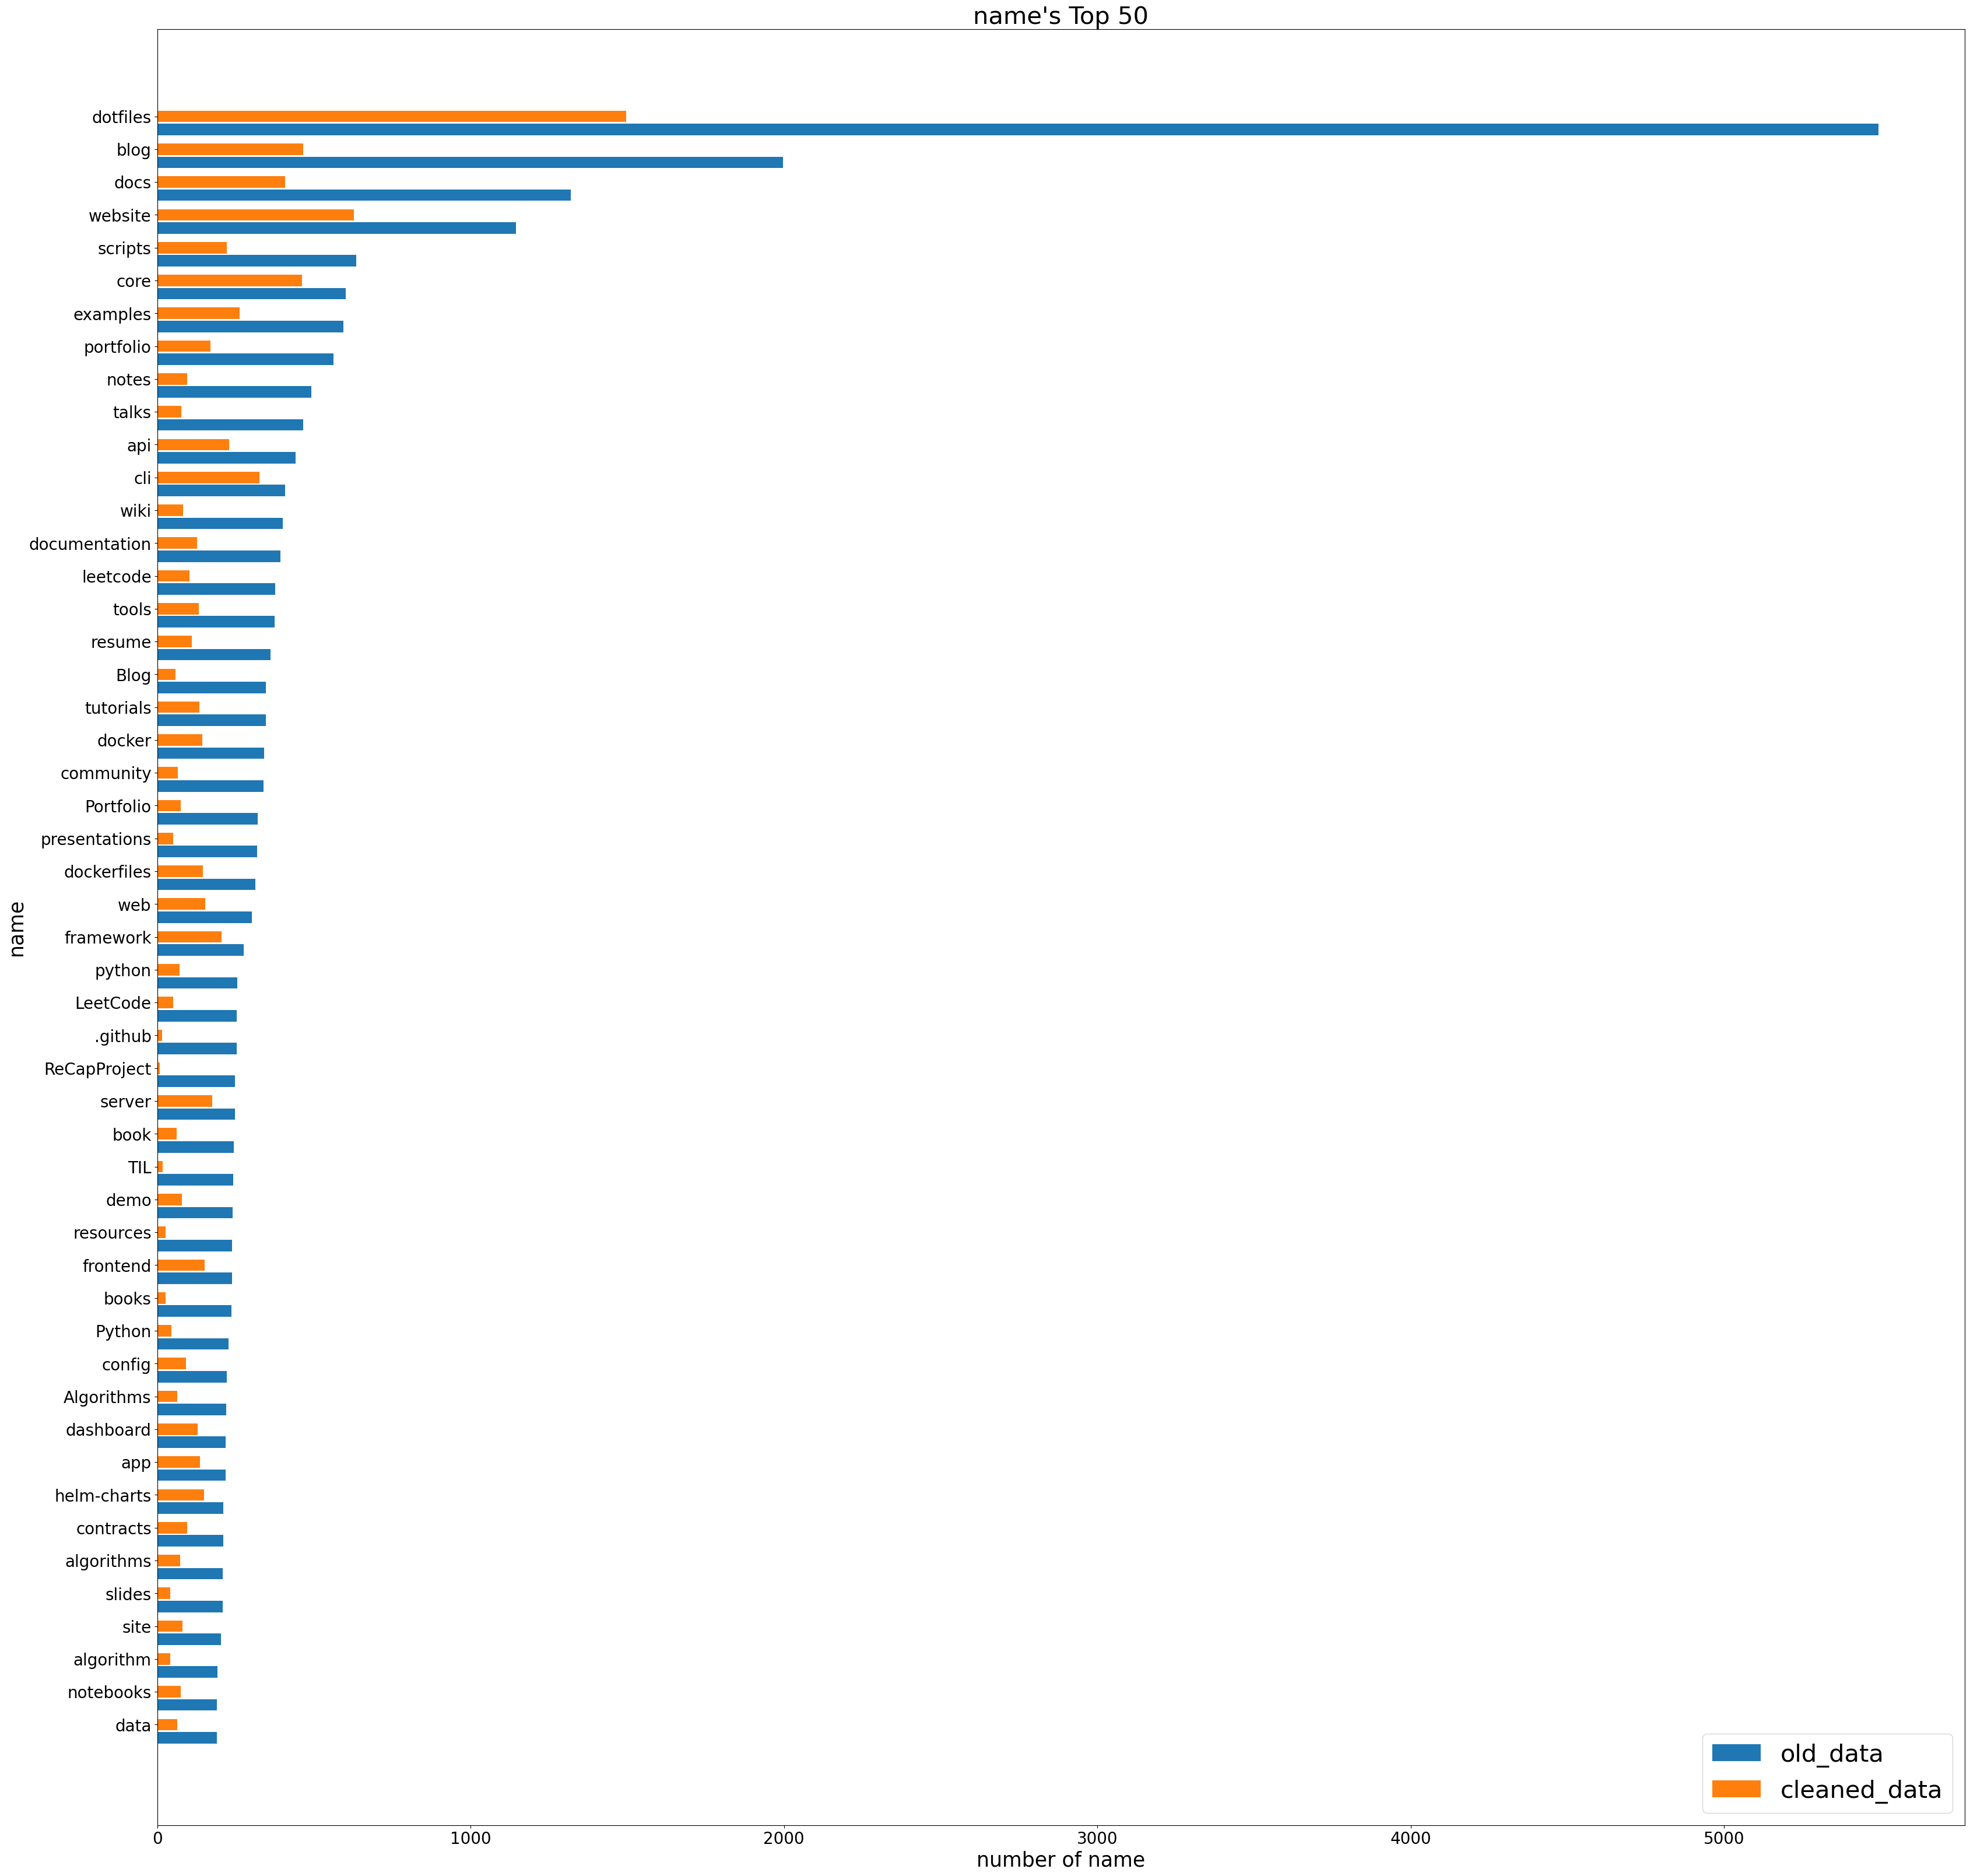

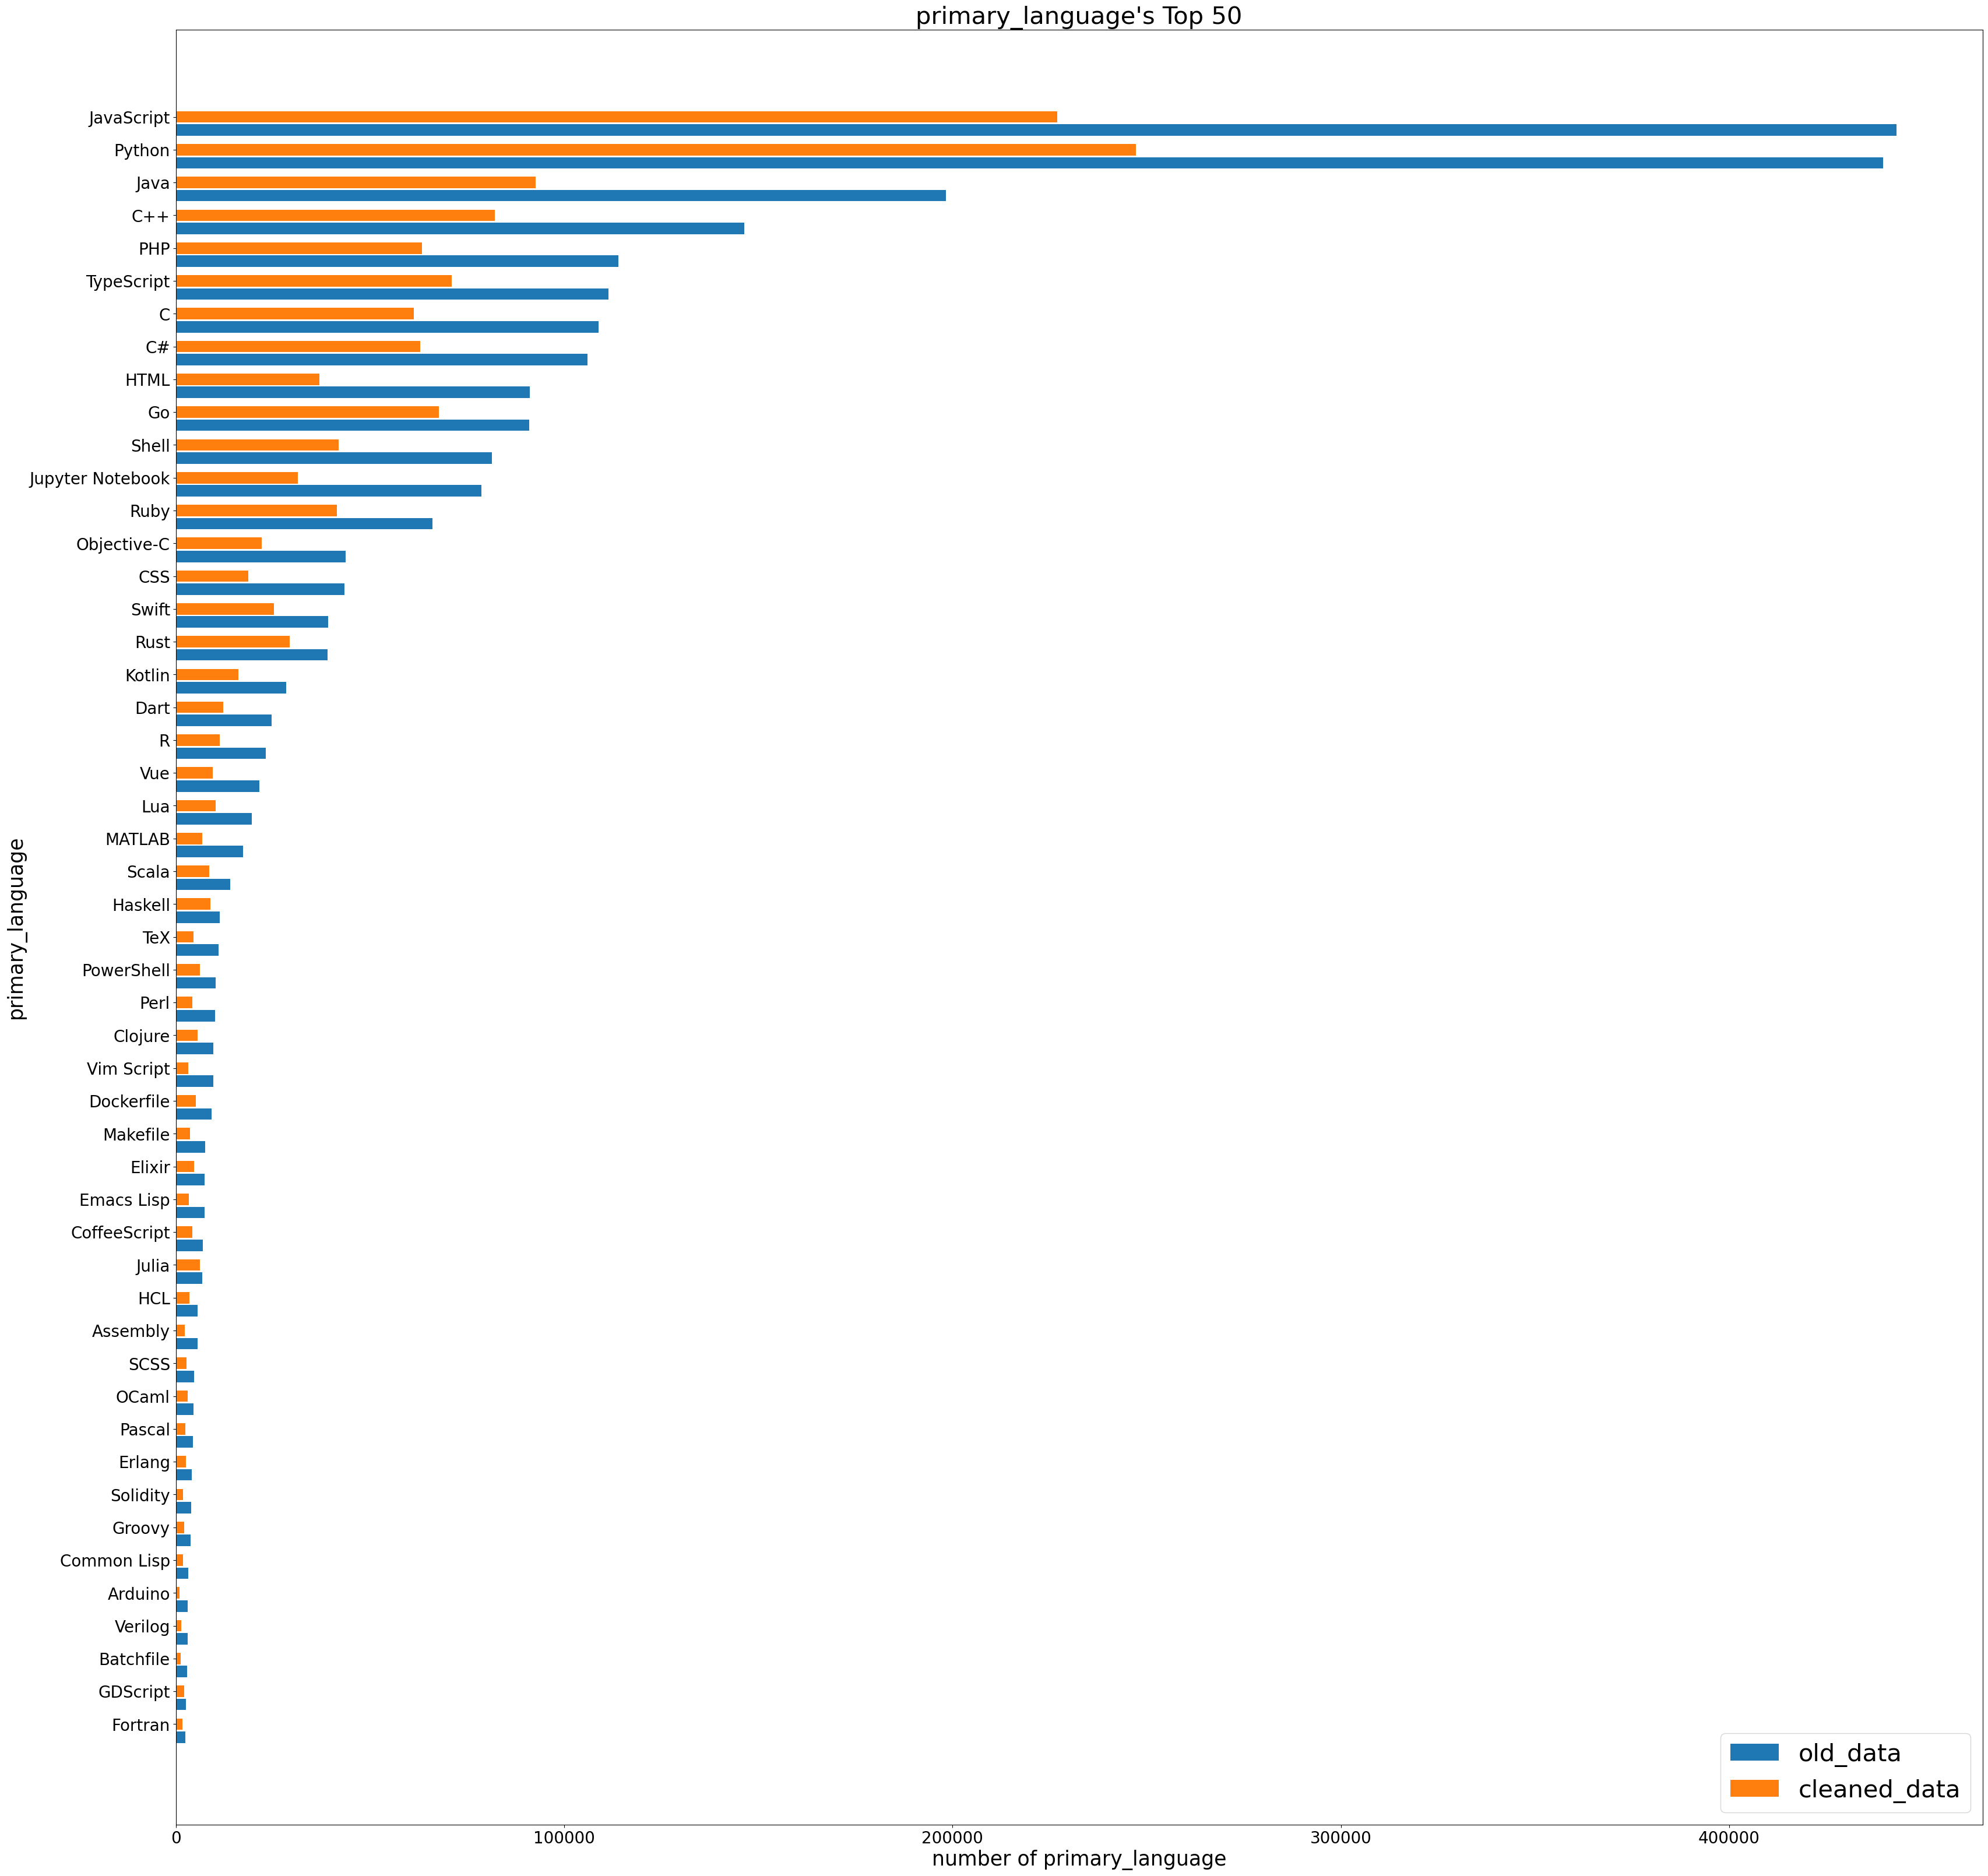

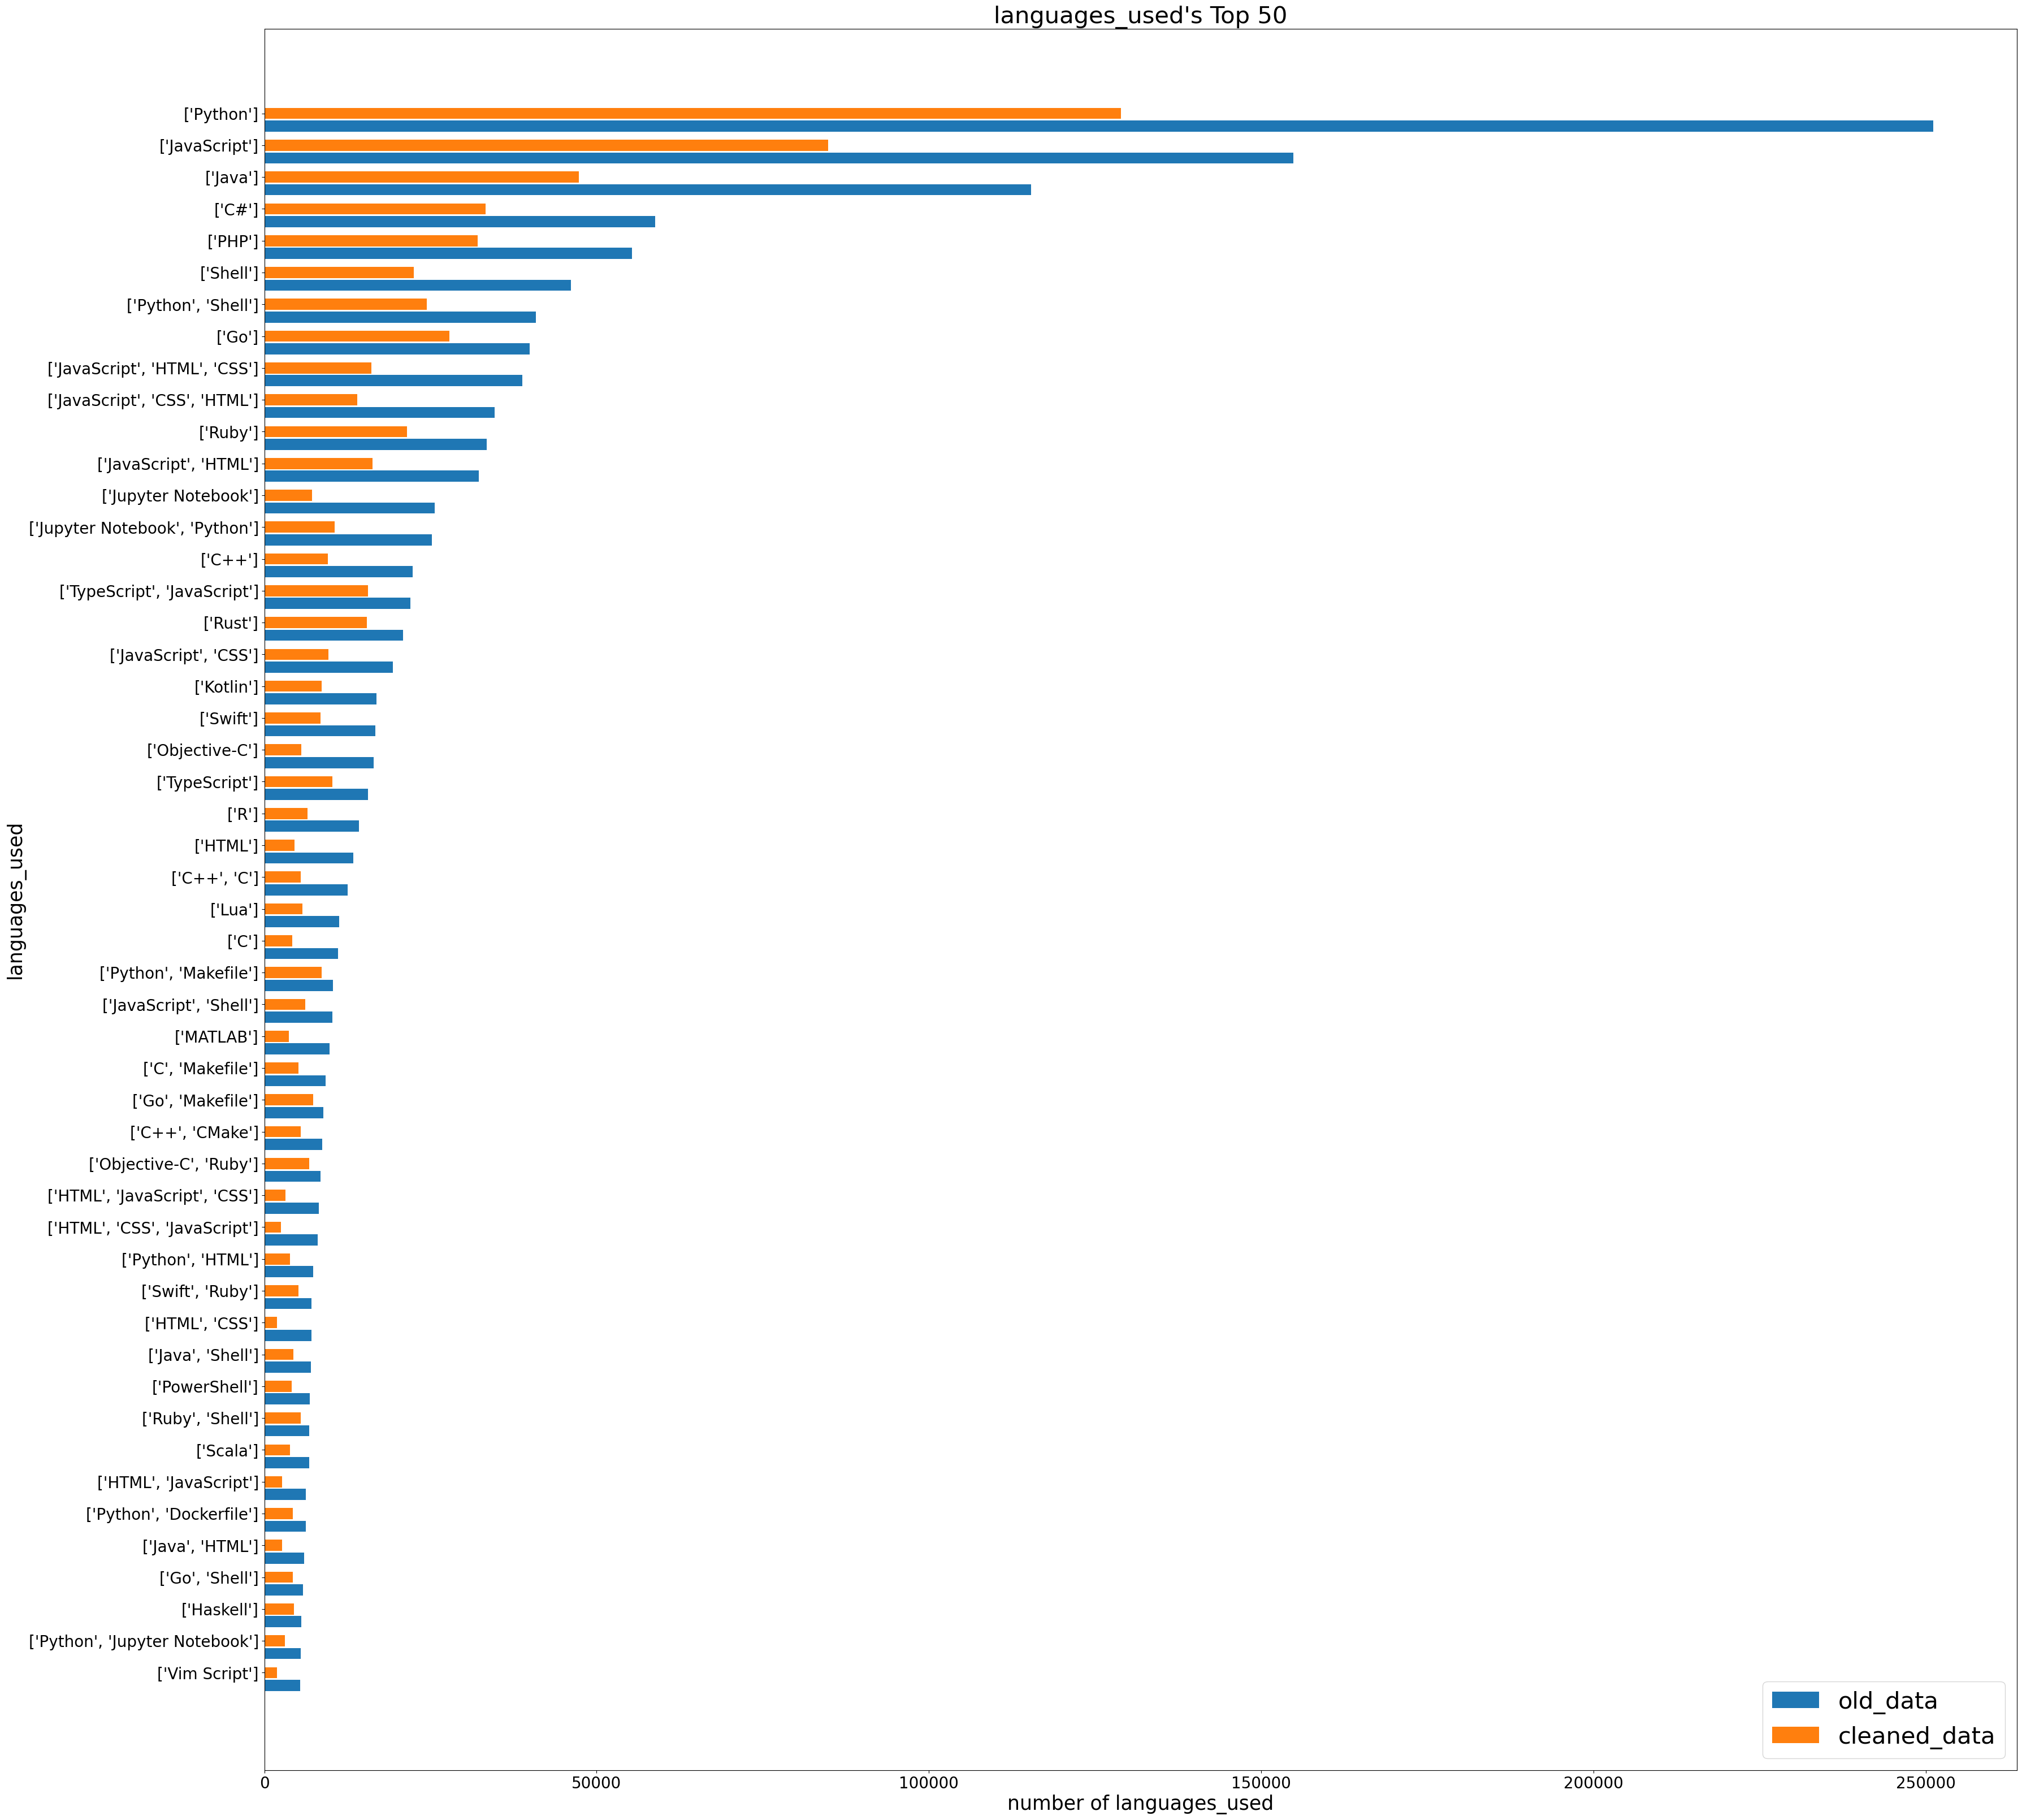

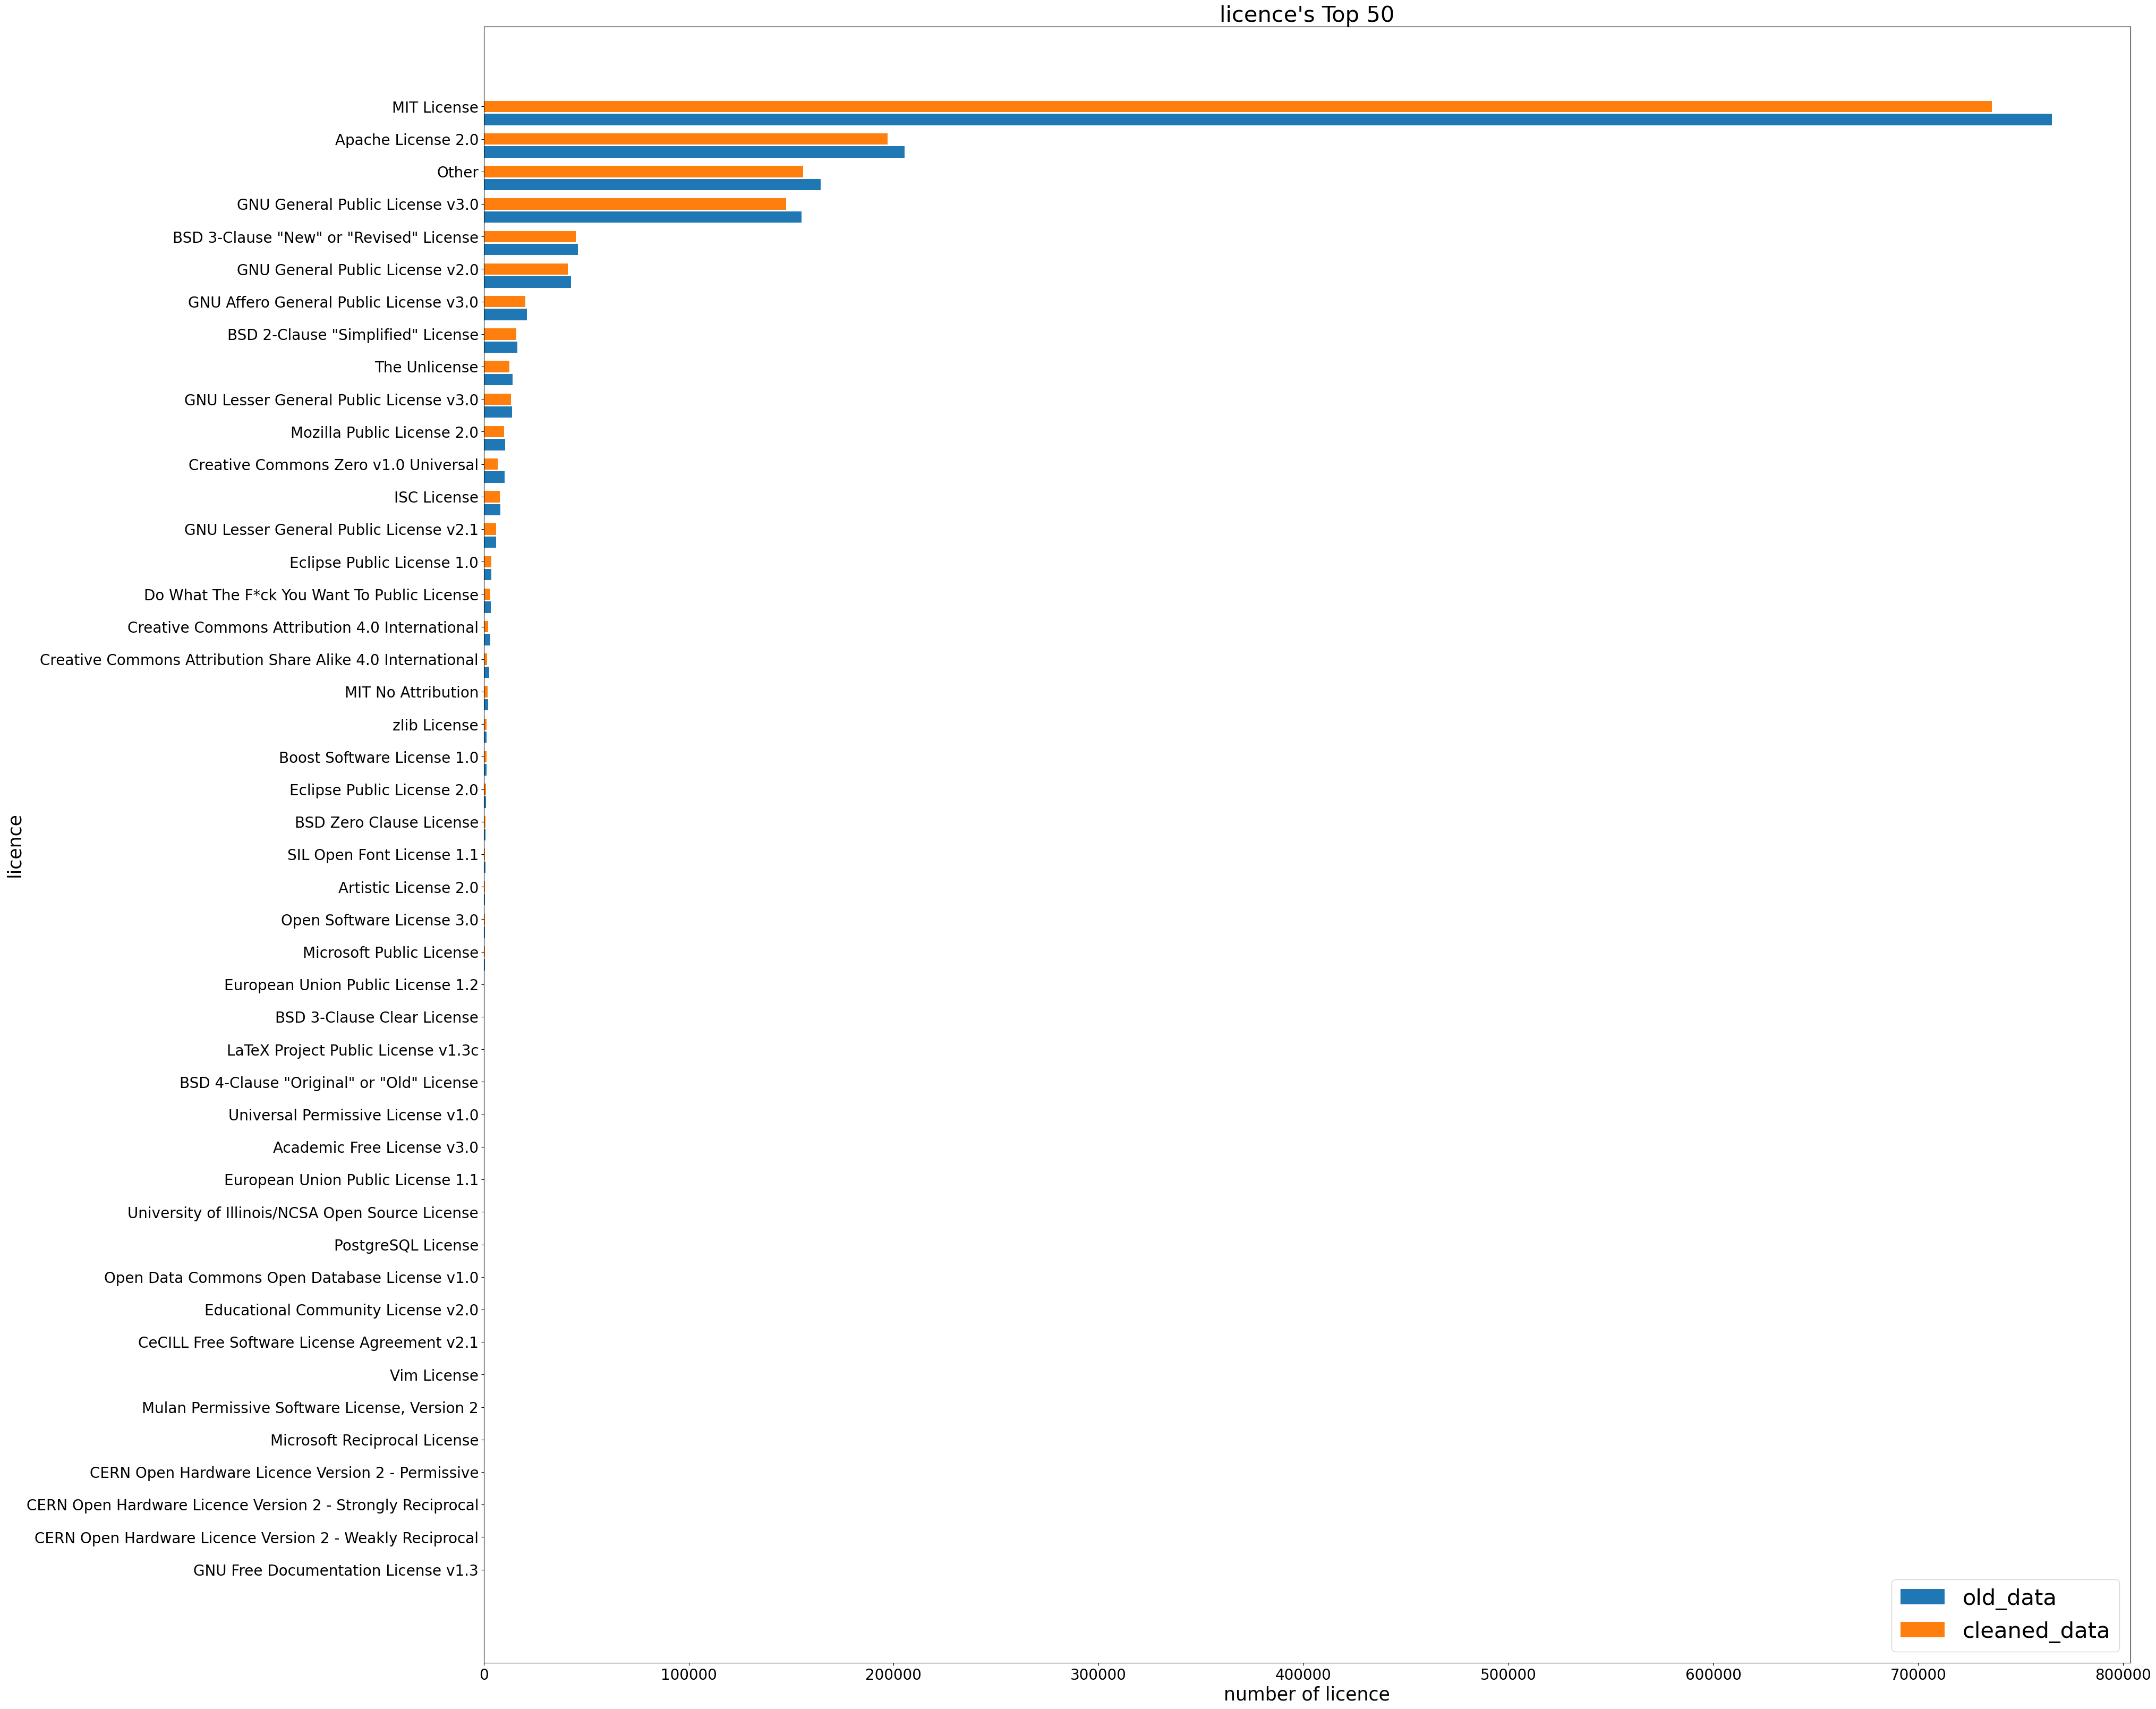

In [16]:
attributes = ['name', 'primary_language', 'languages_used', 'licence']
for attribute in attributes:
    draw_top50_hist_compare(attribute, githubData_DataFrame, cleaned_data_by_remove_nan)

可以看到由于 licence 属性的缺失值过多，所以简单地剔除缺失部分会对其他几个标称属性的分布产生较大影响

### 二、用最高频率值来填补缺失值

In [17]:
missing_value_attrs = ['name', 'primary_language', 'languages_used', 'licence', 'commit_count']
highest_frequency = {}
for attr in missing_value_attrs:
    highest_frequency[attr] = githubData_DataFrame[attr].value_counts().index[0]
highest_frequency

{'name': 'dotfiles',
 'primary_language': 'JavaScript',
 'languages_used': "['Python']",
 'licence': 'MIT License',
 'commit_count': 2.0}

In [18]:
cleaned_data_by_highest_frequency_value = copy.deepcopy(githubData_DataFrame)
for attr in missing_value_attrs:
    cleaned_data_by_highest_frequency_value[attr] = cleaned_data_by_highest_frequency_value[attr].replace(np.nan, highest_frequency[attr])

新旧数据对比

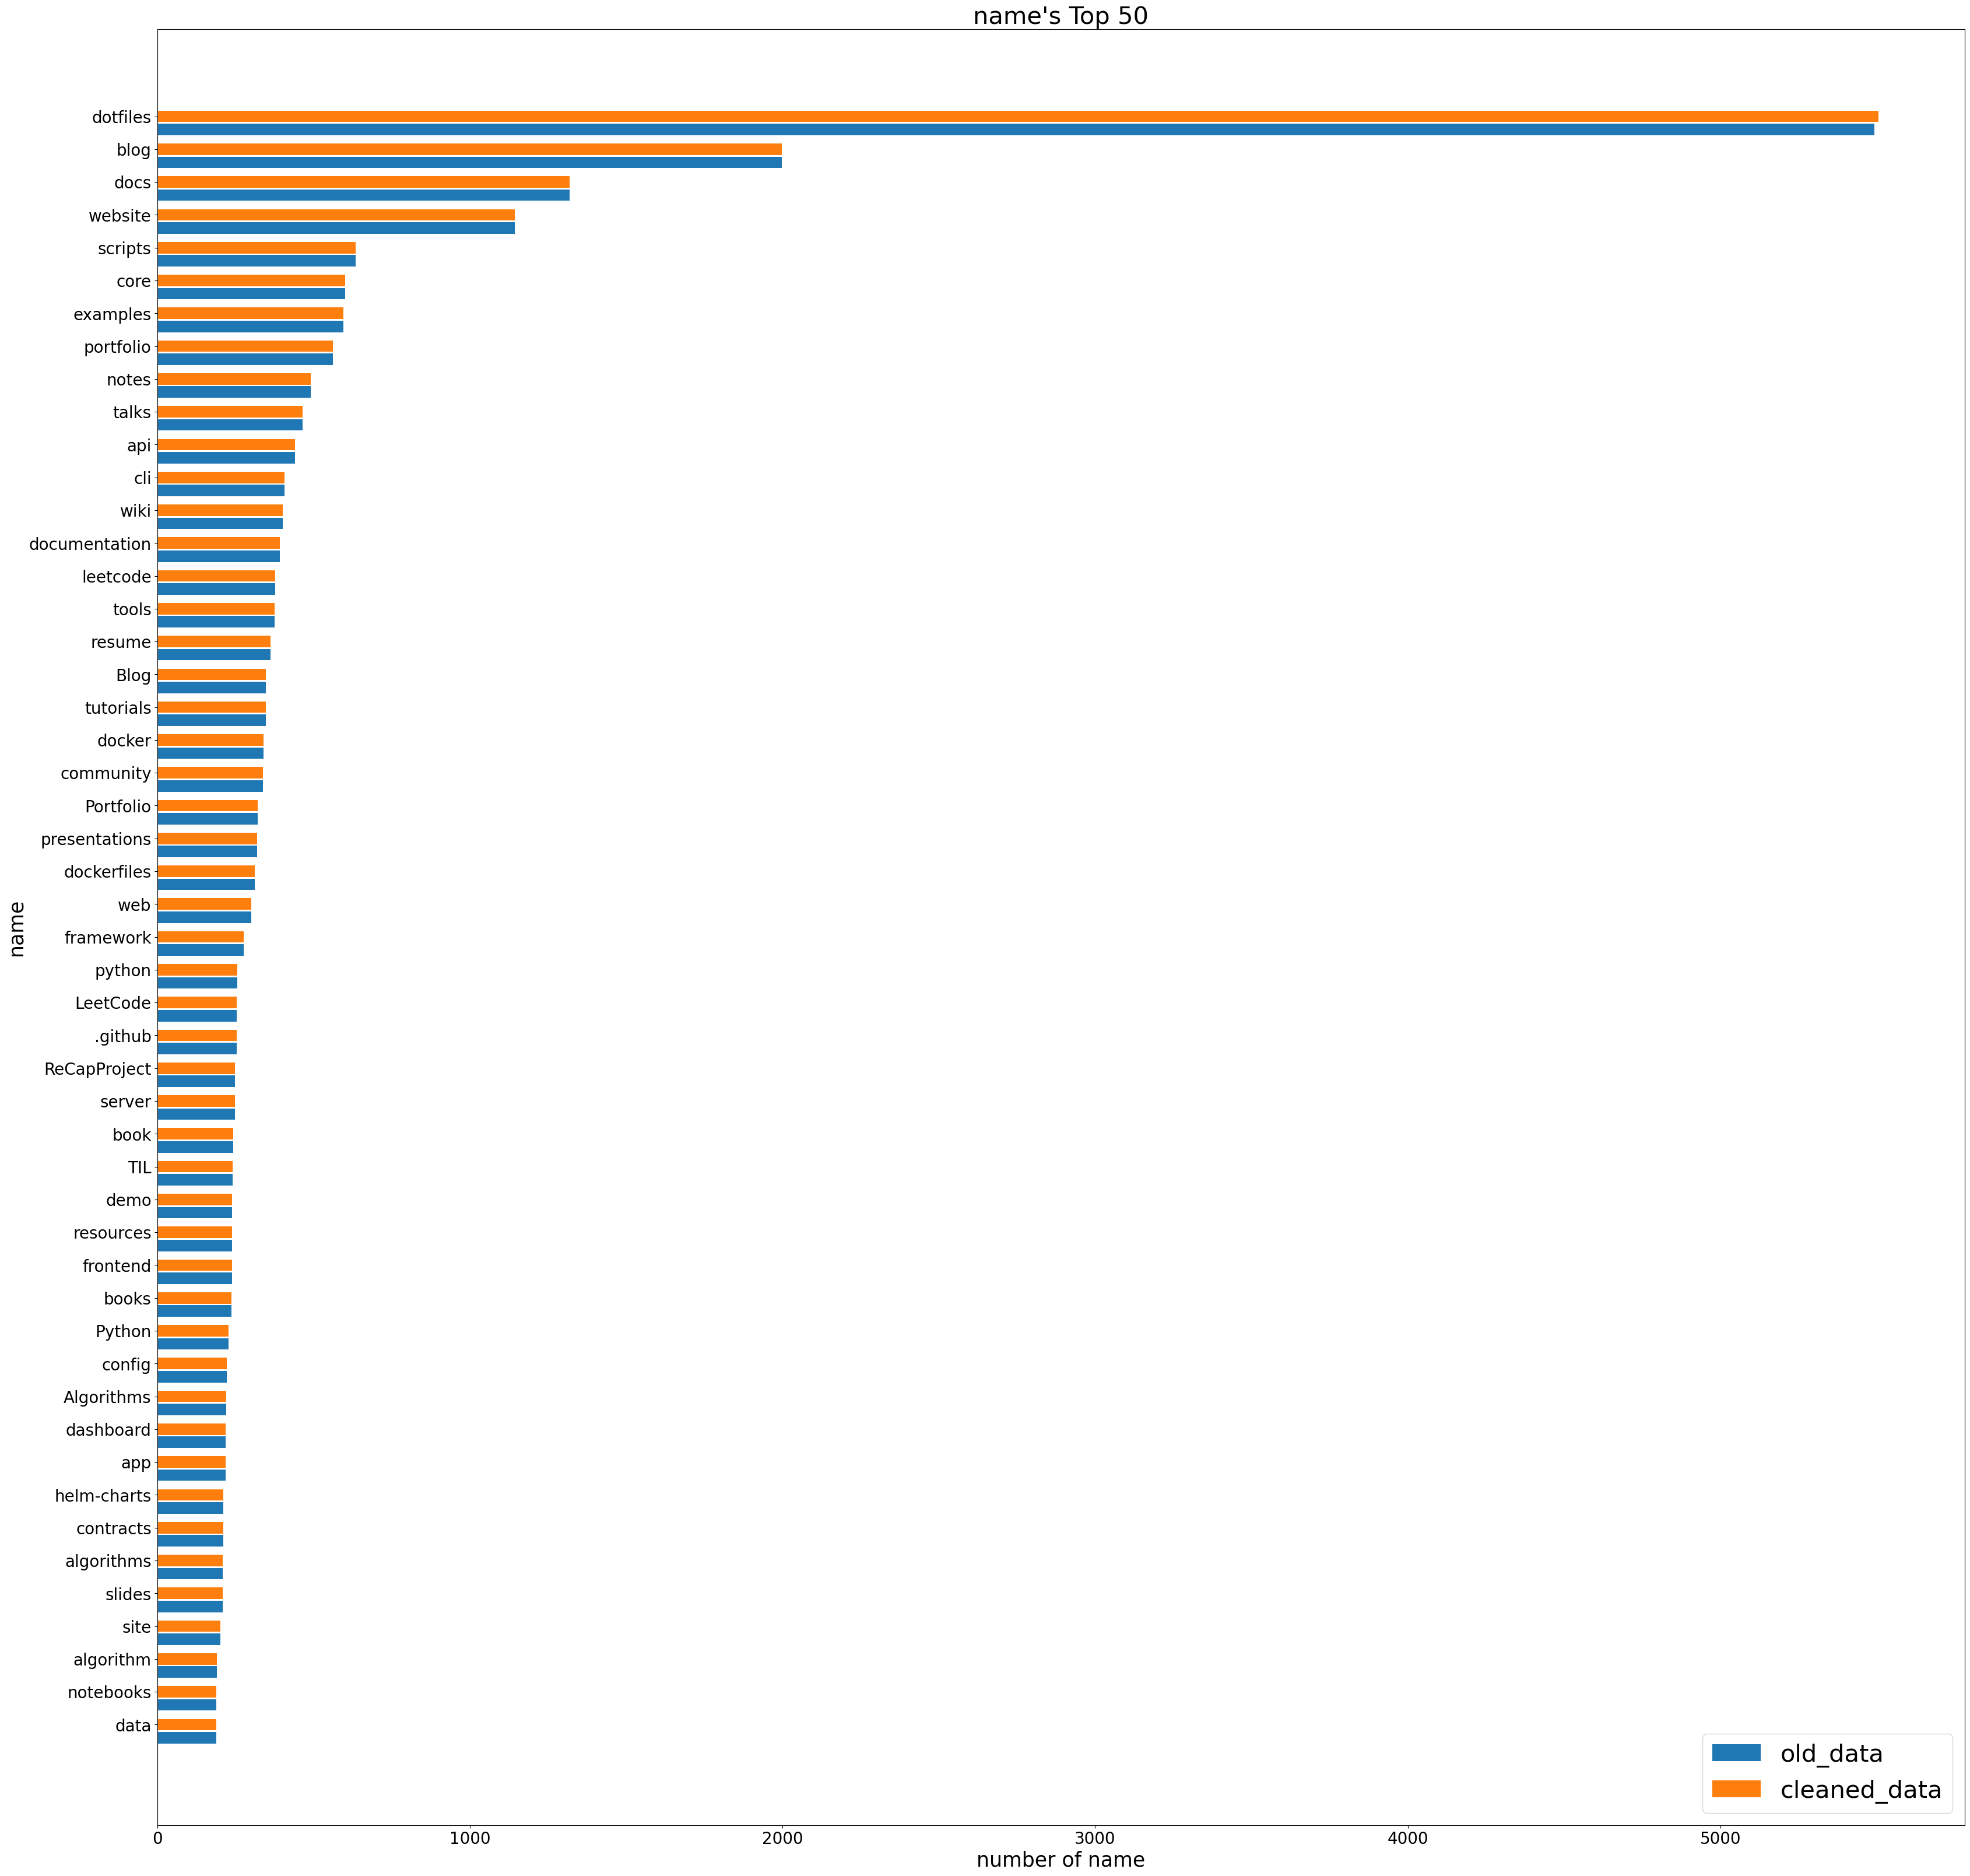

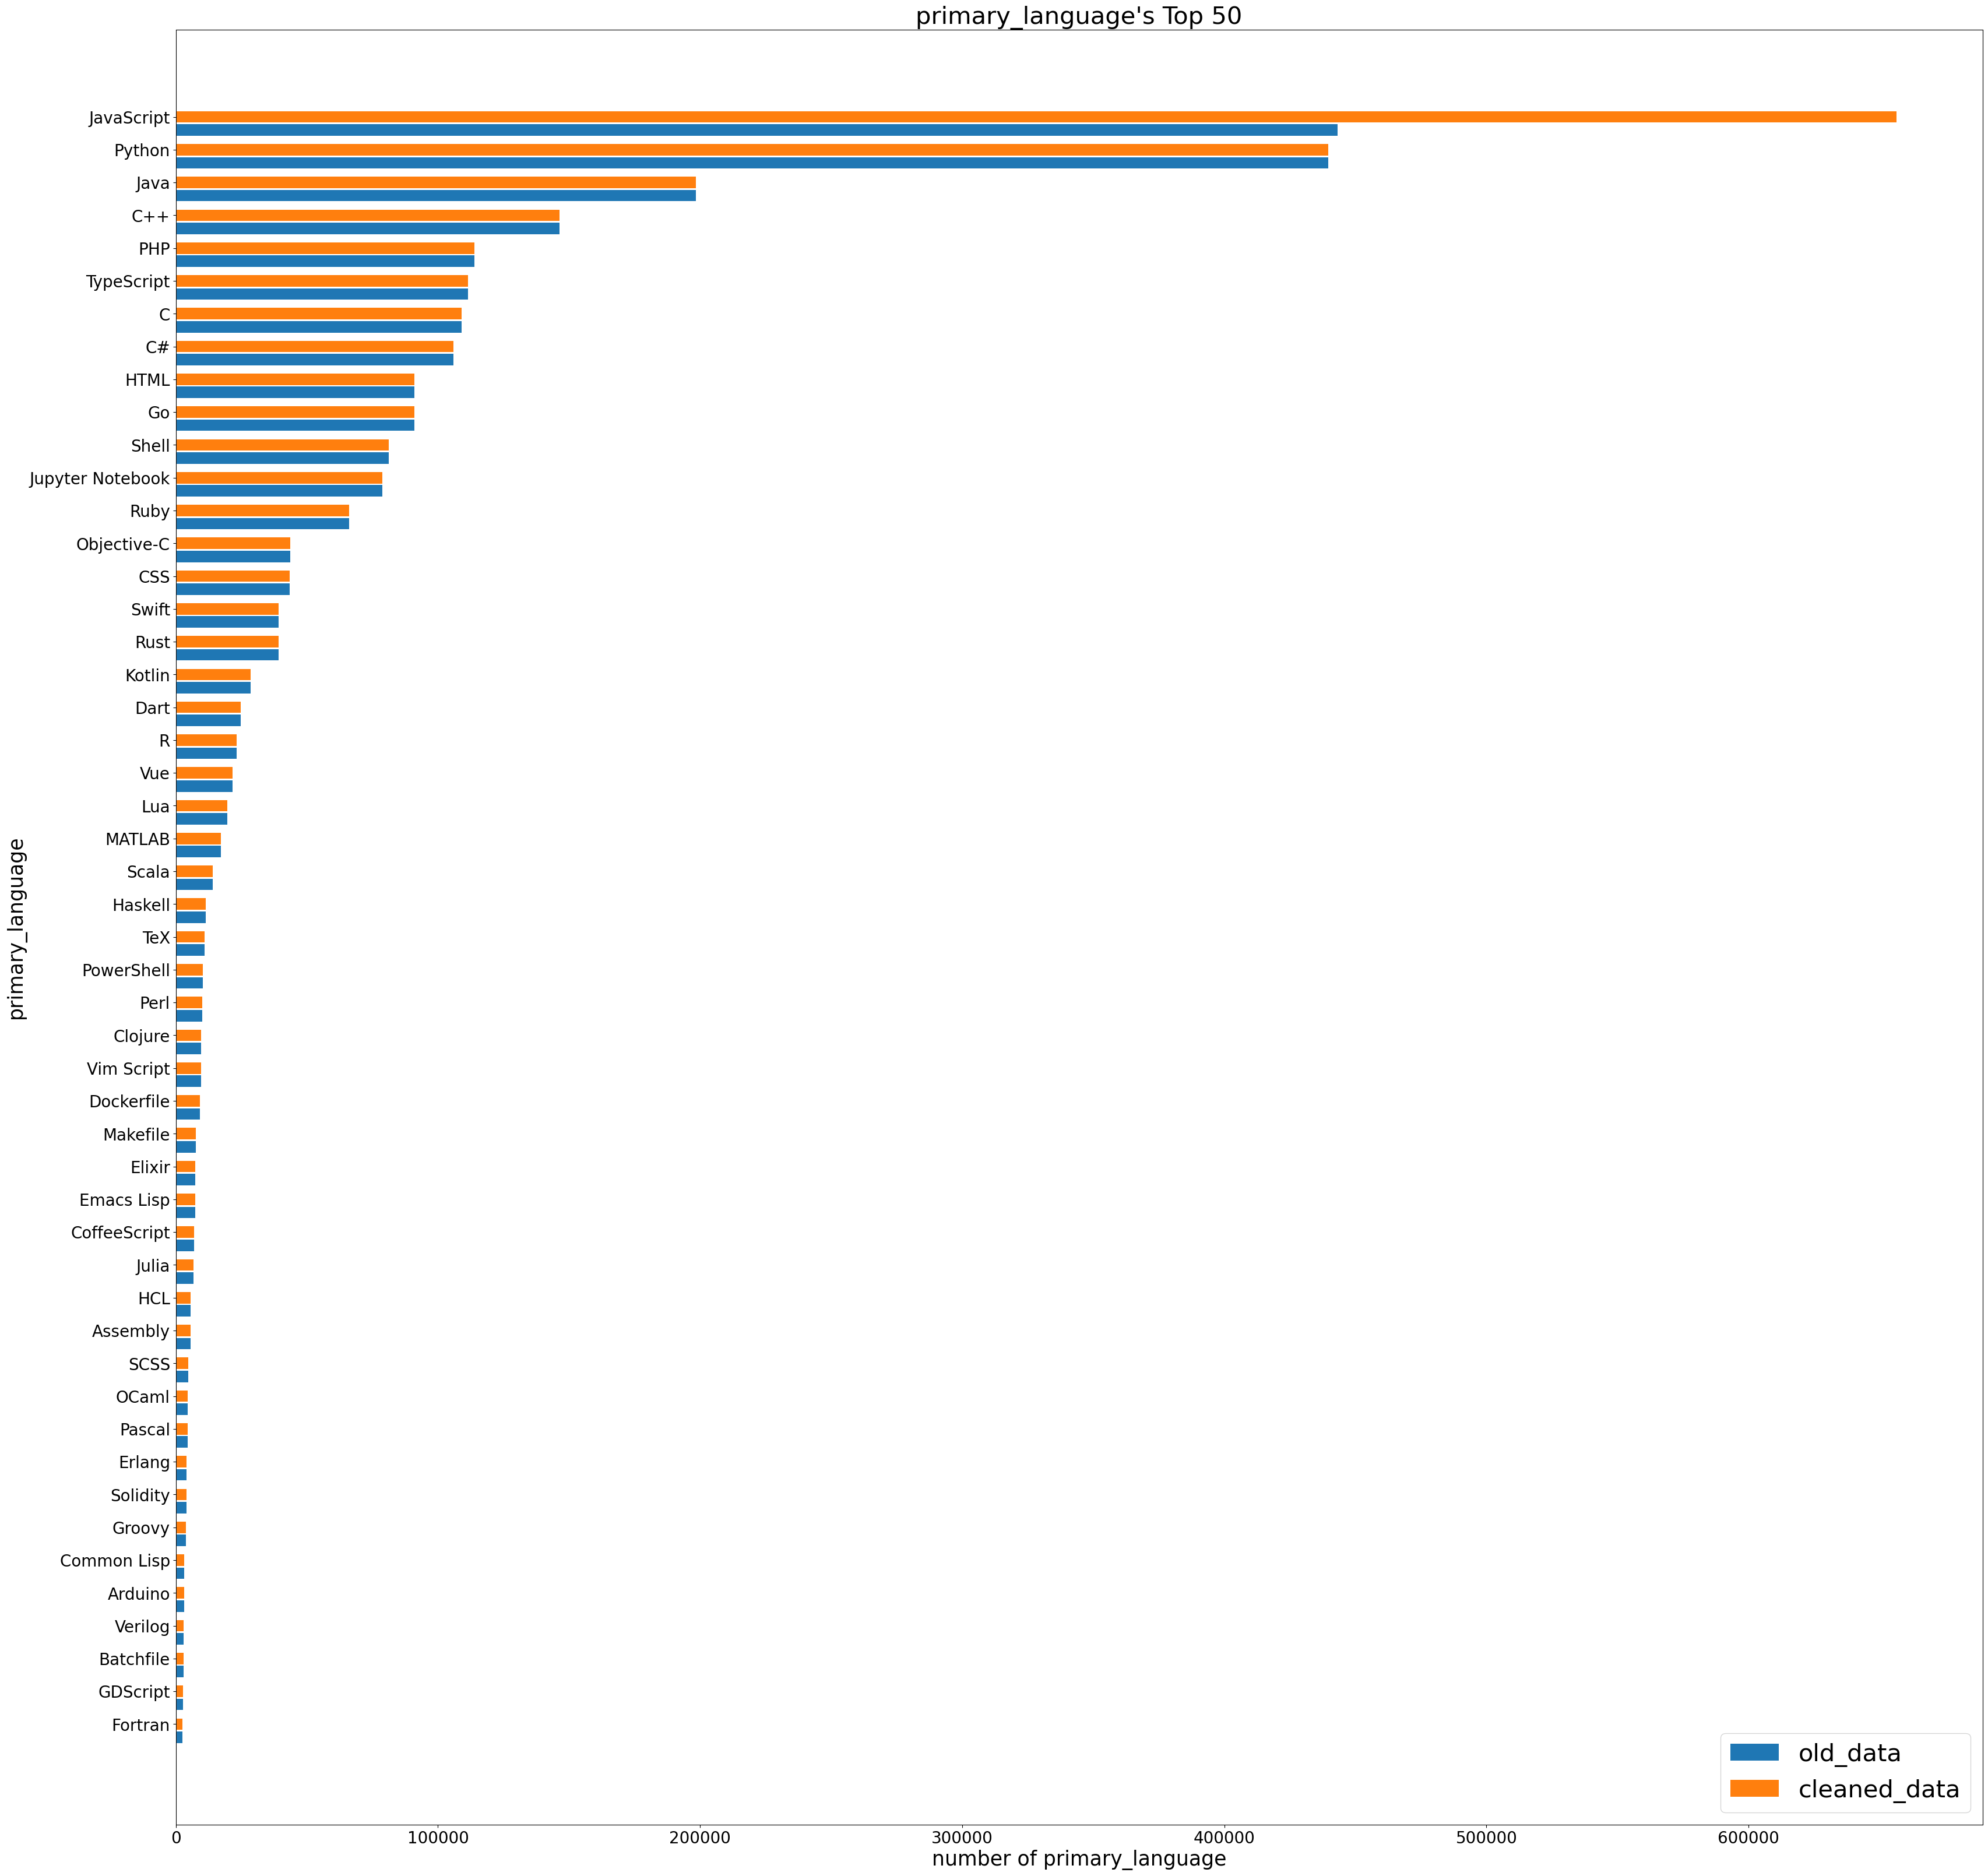

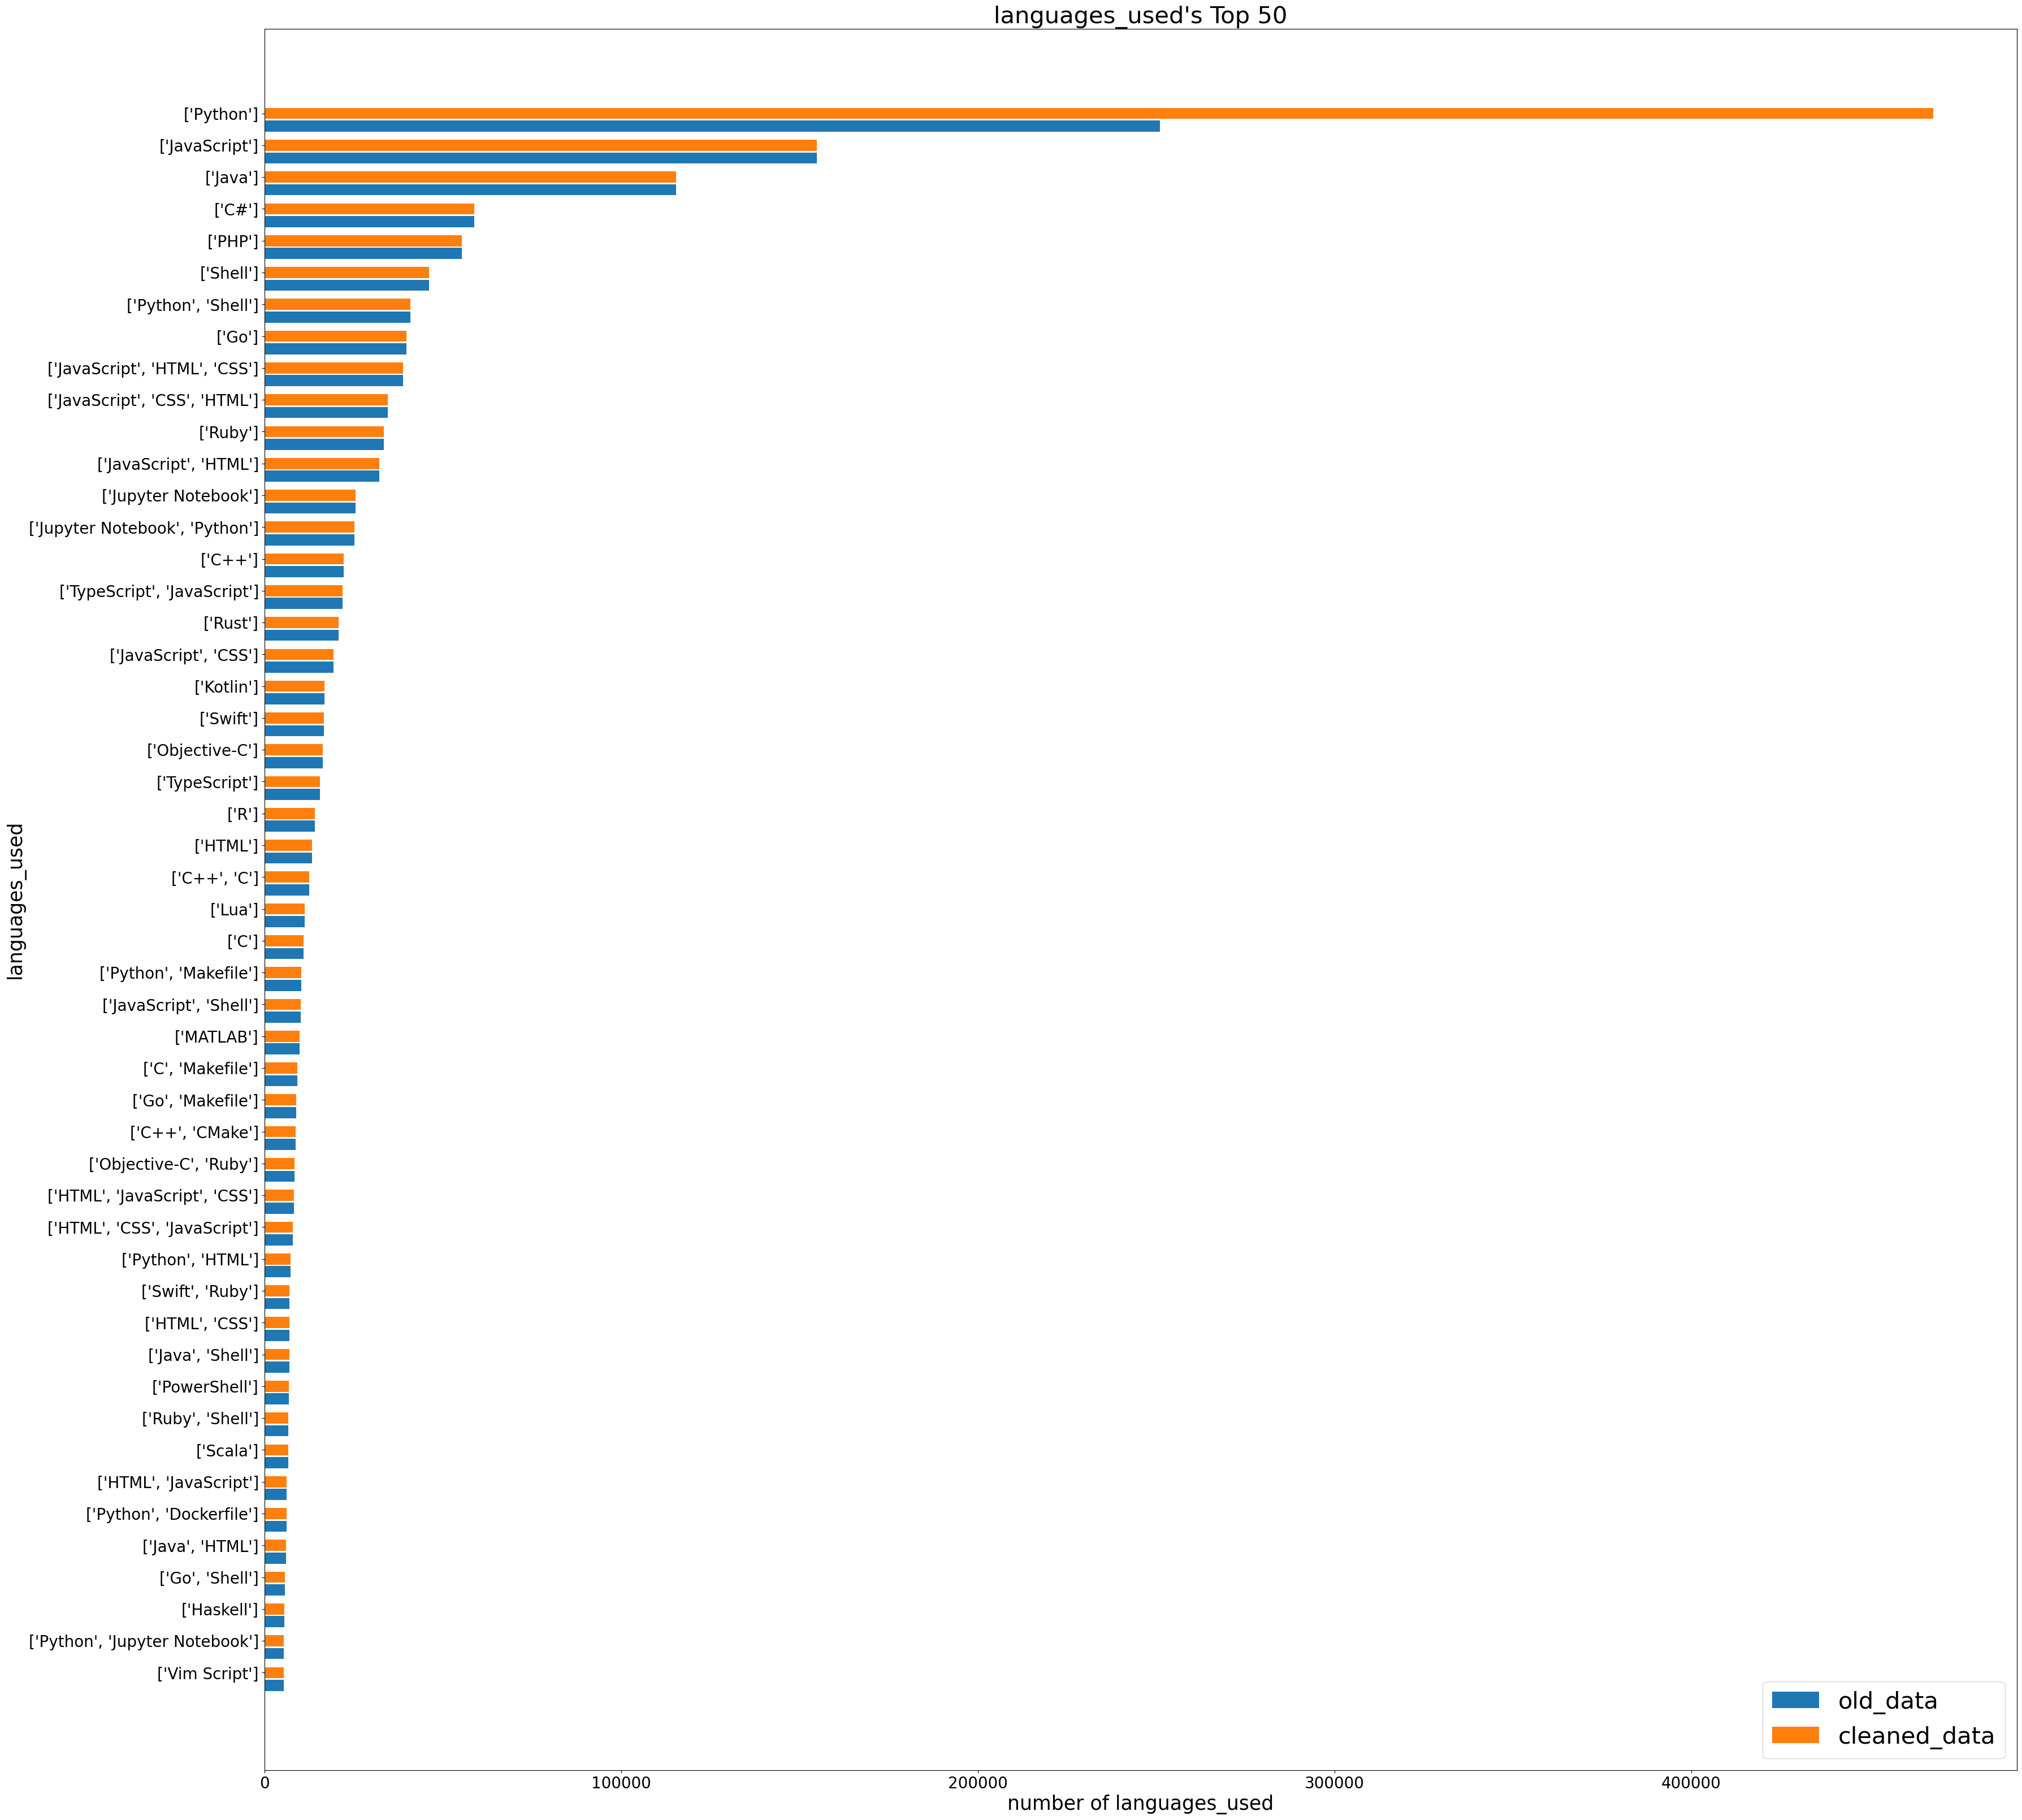

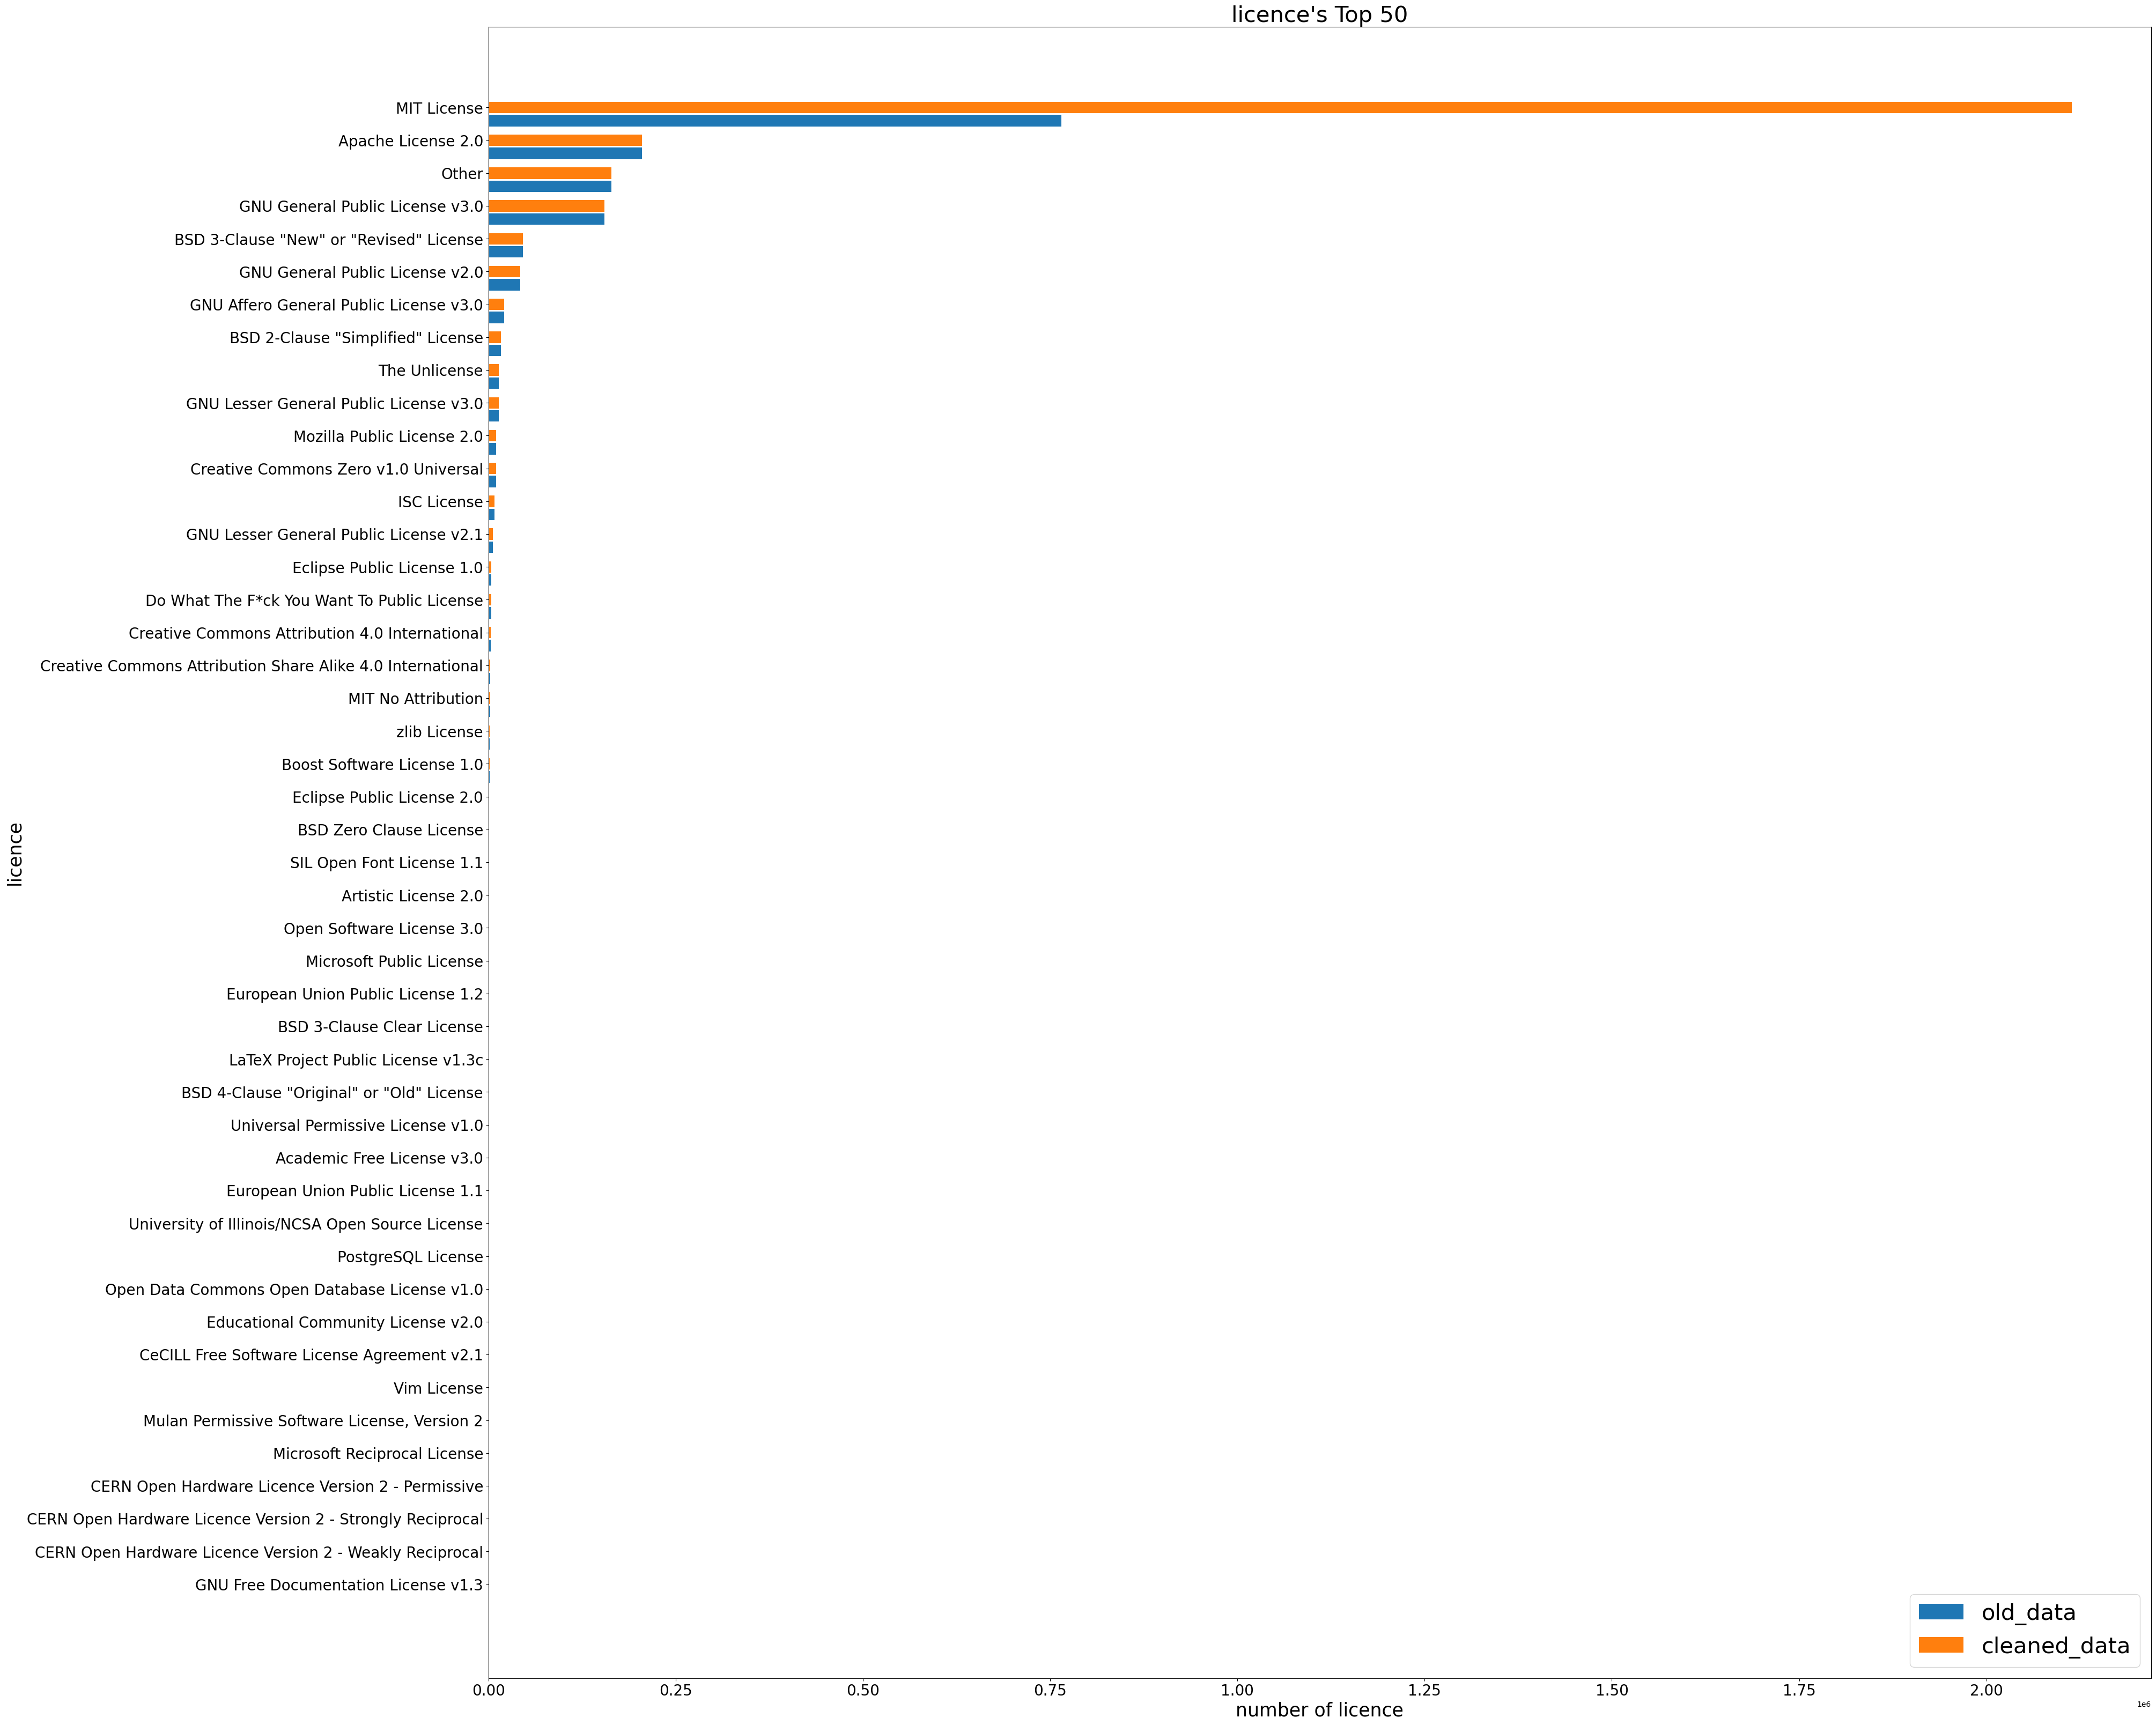

In [19]:
attributes = ['name', 'primary_language', 'languages_used', 'licence']
for attribute in attributes:
    draw_top50_hist_compare(attribute, githubData_DataFrame, cleaned_data_by_highest_frequency_value)

可以看到用最高频率值来填补缺失值会使得每个属性中出现频率最高的值的频率变得更高，并且缺失值越多，频率增大得越显著

### 三、通过属性的相关关系来填补缺失值

In [20]:
attr_correlation = copy.deepcopy(
    githubData_DataFrame.loc[:, ('stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count')])
corr = attr_correlation.corr(method='spearman')
corr

stars_count  forks_count  watchers  pull_requests  commit_count
stars_count       1.000000     0.665184  0.498063       0.315612      0.248692
forks_count       0.665184     1.000000  0.528293       0.378342      0.244920
watchers          0.498063     0.528293  1.000000       0.379439      0.342053
pull_requests     0.315612     0.378342  0.379439       1.000000      0.562481
commit_count      0.248692     0.244920  0.342053       0.562481      1.000000

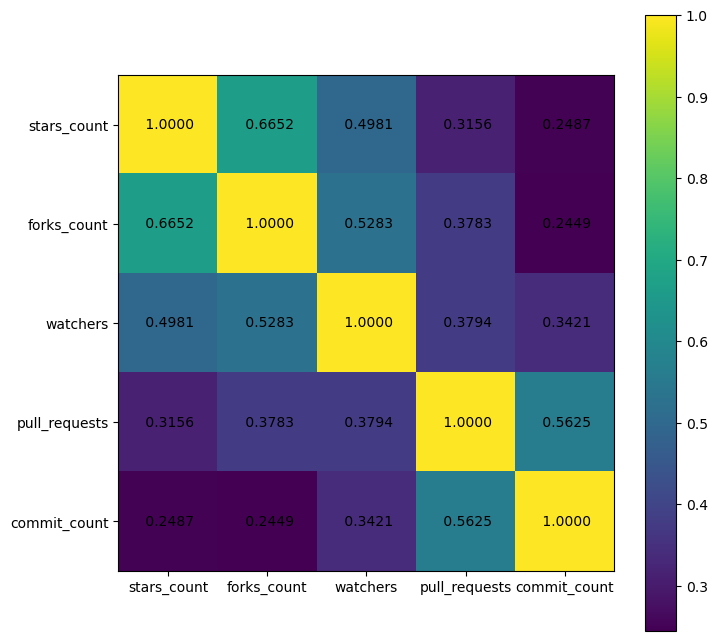

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(ticks=np.arange(0, 5), labels=['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count'])
plt.yticks(ticks=np.arange(0, 5), labels=['stars_count', 'forks_count', 'watchers', 'pull_requests', 'commit_count'])
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{corr.iloc[i, j]: .4f}', ha='center', va='center')

选取与 commit_count 相关性最高的 pull_requests 属性来填补缺失值

In [22]:
relation_pull = githubData_DataFrame.groupby('commit_count').agg(avg=('pull_requests', 'mean'))
relation_pull

avg
commit_count           
1.0            1.409577
2.0            1.093734
3.0            1.113696
4.0            1.418779
5.0            1.106374
...                 ...
2000000.0      6.000000
2030023.0      0.000000
2031609.0      4.000000
3000007.0      0.000000
4314502.0     37.000000

[17159 rows x 1 columns]

In [23]:
cleaned_data_by_correlation = copy.deepcopy(githubData_DataFrame.loc[:, ('pull_requests', 'commit_count')])
nan_mask = cleaned_data_by_correlation['commit_count'].isna()
cleaned_data = cleaned_data_by_correlation[nan_mask].values
for i in range(len(cleaned_data)):
    print(f'\r{i}', end='')
    rate = cleaned_data_by_correlation[nan_mask]['pull_requests'].iloc[i]
    # dist = []
    # for j in range(len(relation_pull)):
    #     dist.append(abs(relation_pull.iloc[j]['avg'] - rate))
    dist = abs(relation_pull.loc[:, 'avg'] - rate)
    idx = np.argmin(dist)
    cleaned_data[i, 1] = relation_pull.index[idx]
cleaned_data_by_correlation[nan_mask] = cleaned_data

1886

In [24]:
print(githubData_DataFrame.loc[:, 'commit_count'].value_counts())
print(cleaned_data_by_correlation.loc[:, 'commit_count'].value_counts())
print(cleaned_data_by_correlation.loc[:, 'commit_count'].value_counts() - githubData_DataFrame.loc[:, 'commit_count'].value_counts())

commit_count
2.0         100678
3.0          99933
4.0          93553
5.0          87794
6.0          80358
             ...  
15787.0          1
22041.0          1
5745.0           1
330534.0         1
12981.0          1
Name: count, Length: 17159, dtype: int64
commit_count
2.0        100678
3.0         99933
4.0         93553
5.0         87794
6.0         80358
            ...  
18003.0         1
20376.0         1
15787.0         1
22041.0         1
12981.0         1
Name: count, Length: 17159, dtype: int64
commit_count
1.0          0
2.0          0
3.0          0
4.0          0
5.0          0
            ..
2000000.0    0
2030023.0    0
2031609.0    0
3000007.0    0
4314502.0    0
Name: count, Length: 17159, dtype: int64


可以增加的情况几乎完全随机，这是因为 commit_count 与所选属性的关联不大，因此没有特别的规律

### 四、通过数据对象之间的相似性来填补缺失值

使用无缺失值的 stars_count, forks_count, watchers 和 pull_requests 四个属性用于衡量数据对象之间的相似性，先将它们归一化

In [25]:
def min_max(x):
    return (x - x.min()) / (x.max() - x.min())

In [26]:
ref_attributes = ['stars_count', 'forks_count', 'watchers', 'pull_requests']
standardized_data = copy.deepcopy(githubData_DataFrame)
for ref_attribute in ref_attributes:
    attr_data = standardized_data[ref_attribute]
    standardized_data[ref_attribute] = min_max(attr_data)
standardized_data.head(10)

name  stars_count  forks_count  watchers  \
0                 freeCodeCamp     1.000000     0.127221  0.885163   
1                      996.ICU     0.735983     0.088643  0.450335   
2       free-programming-books     0.729227     0.220067  1.000000   
3  coding-interview-university     0.680720     0.268521  0.894698   
4                      awesome     0.653749     0.102354  0.780176   
5            developer-roadmap     0.628066     0.134323  0.721396   
6                  public-apis     0.626079     0.105917  0.395222   
7         system-design-primer     0.580804     0.154471  0.677494   
8                          vue     0.561124     0.137299  0.634011   
9                        react     0.558183     0.172253  0.696144   

   pull_requests primary_language  \
0       0.105665       TypeScript   
1       0.006463              NaN   
2       0.027306              NaN   
3       0.002875              NaN   
4       0.006164              NaN   
5       0.006904            Astro   
6       0.009606           Python   
7       0.001509           Python   
8       0.007842       TypeScript   
9       0.043308       JavaScript   

                                      languages_used  commit_count  \
0  ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...       32231.0   
1                                                NaN        3189.0   
2                                                NaN        8286.0   
3                                                NaN        2314.0   
4                                                NaN        1074.0   
5       ['Astro', 'JavaScript', 'TypeScript', 'CSS']        2821.0   
6                                ['Python', 'Shell']        4527.0   
7                                ['Python', 'Shell']         328.0   
8  ['TypeScript', 'JavaScript', 'HTML', 'CSS', 'S...        3545.0   
9  ['JavaScript', 'HTML', 'CSS', 'C++', 'TypeScri...       15461.0   

             created_at                                            licence  
0  2014-12-24T17:49:19Z            BSD 3-Clause "New" or "Revised" License  
1  2019-03-26T07:31:14Z                                              Other  
2  2013-10-11T06:50:37Z                                              Other  
3  2016-06-06T02:34:12Z  Creative Commons Attribution Share Alike 4.0 I...  
4  2014-07-11T13:42:37Z               Creative Commons Zero v1.0 Universal  
5  2017-03-15T13:45:52Z                                              Other  
6  2016-03-20T23:49:42Z                                        MIT License  
7  2017-02-26T16:15:28Z                                              Other  
8  2013-07-29T03:24:51Z                                        MIT License  
9  2013-05-24T16:15:54Z                                        MIT License

In [27]:
def clean_data_by_nearest_sample(attr, dataframe):
    feature_data = copy.deepcopy(dataframe.loc[:, (*ref_attributes, attr)])
    nan_mask = feature_data[attr].isna()
    not_nan = feature_data[~nan_mask].values
    no_nan_data = feature_data[~nan_mask].iloc[:, :4].values
    nan_data = feature_data[nan_mask].values
    nan_feature = feature_data[nan_mask].iloc[:, :4].values
    nan_data_len = nan_data.shape[0]

    for i in range(nan_data_len):
        print(f'\r{i}', end='')
        distance = np.sum(np.square(nan_feature[i] - no_nan_data), axis=-1)
        nearest_idx = np.argmin(distance)
        nan_data[i, 4] = not_nan[nearest_idx, 4]
    print('')
    feature_data[nan_mask] = nan_data
    return feature_data

In [28]:
commit_count_cleaned_data = clean_data_by_nearest_sample('commit_count', standardized_data)
commit_count_cleaned_data.isna().sum()

1886


stars_count      0
forks_count      0
watchers         0
pull_requests    0
commit_count     0
dtype: int64

In [29]:
print(standardized_data.loc[:, 'commit_count'].value_counts())
print(commit_count_cleaned_data.loc[:, 'commit_count'].value_counts())
print(commit_count_cleaned_data.loc[:, 'commit_count'].value_counts() - standardized_data.loc[: 'commit_count'].value_counts())

commit_count
2.0         100678
3.0          99933
4.0          93553
5.0          87794
6.0          80358
             ...  
15787.0          1
22041.0          1
5745.0           1
330534.0         1
12981.0          1
Name: count, Length: 17159, dtype: int64
commit_count
2.0         100701
3.0          99964
4.0          93594
5.0          87814
6.0          80459
             ...  
15787.0          1
22041.0          1
5745.0           1
330534.0         1
12981.0          1
Name: count, Length: 17159, dtype: int64
name                stars_count  forks_count  watchers  pull_requests  primary_language  languages_used                                   commit_count  created_at            licence    
-                   0.000008     0.000000     0.000210  0.000046       HTML              ['HTML', 'CSS', 'JavaScript']                    16.0          2020-05-01T22:31:49Z  MIT License    41137
mochify-istanbul    0.000050     0.000045     0.000524  0.000060       JavaScript        ['Ja

可以看到频数越高增加的值越多，频数相近的值增加的值几乎均匀，这是因为 commit_count 与所选的 4 个属性的关联不大，因此数据对象之间的距离也近似于随机数，没有特别的规律